In [1]:
from mplsoccer import Pitch,VerticalPitch
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [43]:
seta = 0
if(seta==0):
    data = pd.read_csv('firsthalf.csv')
else:
    data = pd.read_csv('secoundhalf.csv')

In [44]:
data = data.replace("-",float(0))

In [45]:
data.Event.unique()

array(['Pass', 'Passfail', 'intercept', 'clear', 'go', 'Cross',
       'ShotOnTarget', 'ShotOffTarget', 'fail', 'getfoul', 'foul',
       'ShotBlock', 'block', 'yellow', 'Assist', 'ShotGetGoal', 'Opgoal'],
      dtype=object)

In [46]:
if(seta==0):
    data['X'] = data['X']*1.2
    data['Y'] = data['Y']*.8
    data['X2'] =data['X2']*1.2
    data['Y2'] = data['Y2']*.8
else:
    data['X'] = 120-data['X']*1.2
    data['Y'] = 80-data['Y']*.8
    data['X2'] = 120-data['X2']*1.2
    data['Y2'] = 80-data['Y2']*.8

In [47]:
data

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,Home,Siwakorn,Pass,0,0,33.6,68.8,24.0,73.6
1,Home,Wasan,Passfail,0,0,22.8,73.6,33.6,76.8
2,Home,Phitiwat,intercept,0,0,18.0,67.2,0.0,0.0
3,Home,Brinner,clear,0,0,19.2,51.2,0.0,0.0
4,Home,Kato,intercept,0,0,43.2,74.4,0.0,0.0
...,...,...,...,...,...,...,...,...,...
292,Home,Brinner,Pass,45,0,37.2,55.2,78.0,44.8
293,Home,Felipe,Pass,45,0,76.8,48.8,92.4,60.8
294,Home,Kato,Pass,45,0,96.0,64.0,110.4,56.0
295,Home,Apirak,intercept,45,0,3.6,39.2,0.0,0.0


In [48]:
if(seta==0):
    data15 = data[(data['Mins'] <= 15 ) ]
    data30 = data[(data['Mins'] <= 30) &(data['Mins'] > 15 ) ]
    data45 = data[(data['Mins'] <= 45 ) &(data['Mins'] > 30 )]
else:
    data15 = data[(data['Mins'] <= 60) &(data['Mins'] > 45 ) ]
    data30 = data[(data['Mins'] <= 75) &(data['Mins'] > 60 ) ]
    data45 = data[(data['Mins'] <= 90 ) &(data['Mins'] > 75 )]

In [49]:
data45

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
197,Home,Shinnaphat,yellow,31,0,85.2,64.0,0.0,0.0
198,Home,Brinner,clear,32,0,4.8,11.2,0.0,0.0
199,Home,Apirak,Pass,32,0,10.8,36.8,26.4,49.6
200,Home,Phitiwat,Pass,32,0,39.6,48.8,54.0,54.4
201,Home,Kato,Pass,32,0,54.0,55.2,45.6,47.2
...,...,...,...,...,...,...,...,...,...
292,Home,Brinner,Pass,45,0,37.2,55.2,78.0,44.8
293,Home,Felipe,Pass,45,0,76.8,48.8,92.4,60.8
294,Home,Kato,Pass,45,0,96.0,64.0,110.4,56.0
295,Home,Apirak,intercept,45,0,3.6,39.2,0.0,0.0


In [50]:
dataShot = data[(data['Event'] == 'ShotOnTarget') |  (data['Event'] == 'ShotOffTarget') |
                         (data['Event'] == 'ShotGetGoal') | (data['Event'] == 'ShotBlock')]
dataShot= dataShot.reset_index()

In [51]:
dataShot

,index,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,16,Home,Getterson,ShotOnTarget,2,0,117.6,46.4,0.0,0.0
1,17,Home,Felipe,ShotOffTarget,2,0,104.4,54.4,0.0,0.0
2,45,Home,Brinner,ShotOffTarget,6,0,109.2,40.0,0.0,0.0
3,77,Home,Getterson,ShotOnTarget,12,0,111.6,43.2,0.0,0.0
4,78,Home,Shinnaphat,ShotBlock,13,0,116.4,32.8,0.0,0.0
5,160,Home,Felipe,ShotOffTarget,25,0,94.8,21.6,0.0,0.0
6,196,Home,Kato,ShotOnTarget,29,0,111.6,41.6,0.0,0.0
7,205,Home,Phitiwat,ShotOnTarget,32,0,85.2,32.0,0.0,0.0
8,212,Home,Brinner,ShotOffTarget,33,0,111.6,44.0,0.0,0.0
9,242,Home,Felipe,ShotGetGoal,38,0,114.0,26.4,0.0,0.0


In [52]:
dataPass = data[(data['Event'] == 'Pass') |  (data['Event'] == 'go') |
                         (data['Event'] == 'Passfail') | (data['Event'] == 'Cross')|  (data['Event'] == 'Assist')]
dataPass15 = data15[(data15['Event'] == 'Pass') |  (data15['Event'] == 'go') |
                         (data15['Event'] == 'Passfail') | (data15['Event'] == 'Cross')|  (data15['Event'] == 'Assist')]
dataPass30 = data30[(data30['Event'] == 'Pass') |  (data30['Event'] == 'go') |
                         (data30['Event'] == 'Passfail') | (data30['Event'] == 'Cross')|  (data30['Event'] == 'Assist')]
dataPass45 = data45[(data45['Event'] == 'Pass') |  (data45['Event'] == 'go') |
                         (data45['Event'] == 'Passfail') | (data45['Event'] == 'Cross')|  (data45['Event'] == 'Assist')]
dataPass = dataPass.reset_index()
dataPass15 = dataPass15.reset_index()
dataPass30 = dataPass30.reset_index()
dataPass45 = dataPass45.reset_index()

In [53]:
dataPass

,index,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,0,Home,Siwakorn,Pass,0,0,33.6,68.8,24.0,73.6
1,1,Home,Wasan,Passfail,0,0,22.8,73.6,33.6,76.8
2,5,Home,Shinnaphat,Pass,1,0,36.0,58.4,64.8,51.2
3,6,Home,Phitiwat,Passfail,1,0,64.8,49.6,72.0,54.4
4,8,Home,Sanukran,Pass,1,0,69.6,20.0,81.6,12.0
...,...,...,...,...,...,...,...,...,...,...
203,290,Home,Sanukran,Pass,45,0,64.8,7.2,50.4,10.4
204,291,Home,Sarawut,Passfail,45,0,45.6,12.8,88.8,66.4
205,292,Home,Brinner,Pass,45,0,37.2,55.2,78.0,44.8
206,293,Home,Felipe,Pass,45,0,76.8,48.8,92.4,60.8


In [54]:
data.Player.unique()

array(['Siwakorn', 'Wasan', 'Phitiwat', 'Brinner', 'Kato', 'Shinnaphat',
       'Sanukran', 'Felipe', 'Sarawut', 'Getterson', 'Apirak'],
      dtype=object)

In [55]:
Pla = "Apirak"
dataPlayer = data[(data['Player'] == Pla) ]
dataPlayer= dataPlayer.reset_index()
pDrtxp = dataPlayer['X']
pDrtyp = dataPlayer['Y']
pDesxp = dataPlayer['X2']
pDesyp = dataPlayer['Y2']
pStyp = dataPlayer['Event']
kunNar =0
pailung = 0
pf = 0
for j in range(len(pStyp)):
    if(pDrtxp[j] > pDesxp[j]):
        pailung += 1
    if(pDrtxp[j] < pDesxp[j]):
        kunNar += 1
for j in range(len(pStyp)):
    if(pStyp[j] == 'Passfail'):
        pf +=1

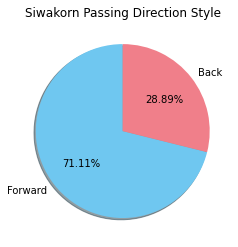

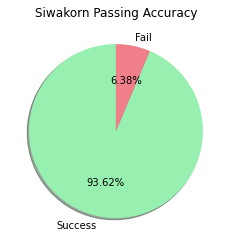

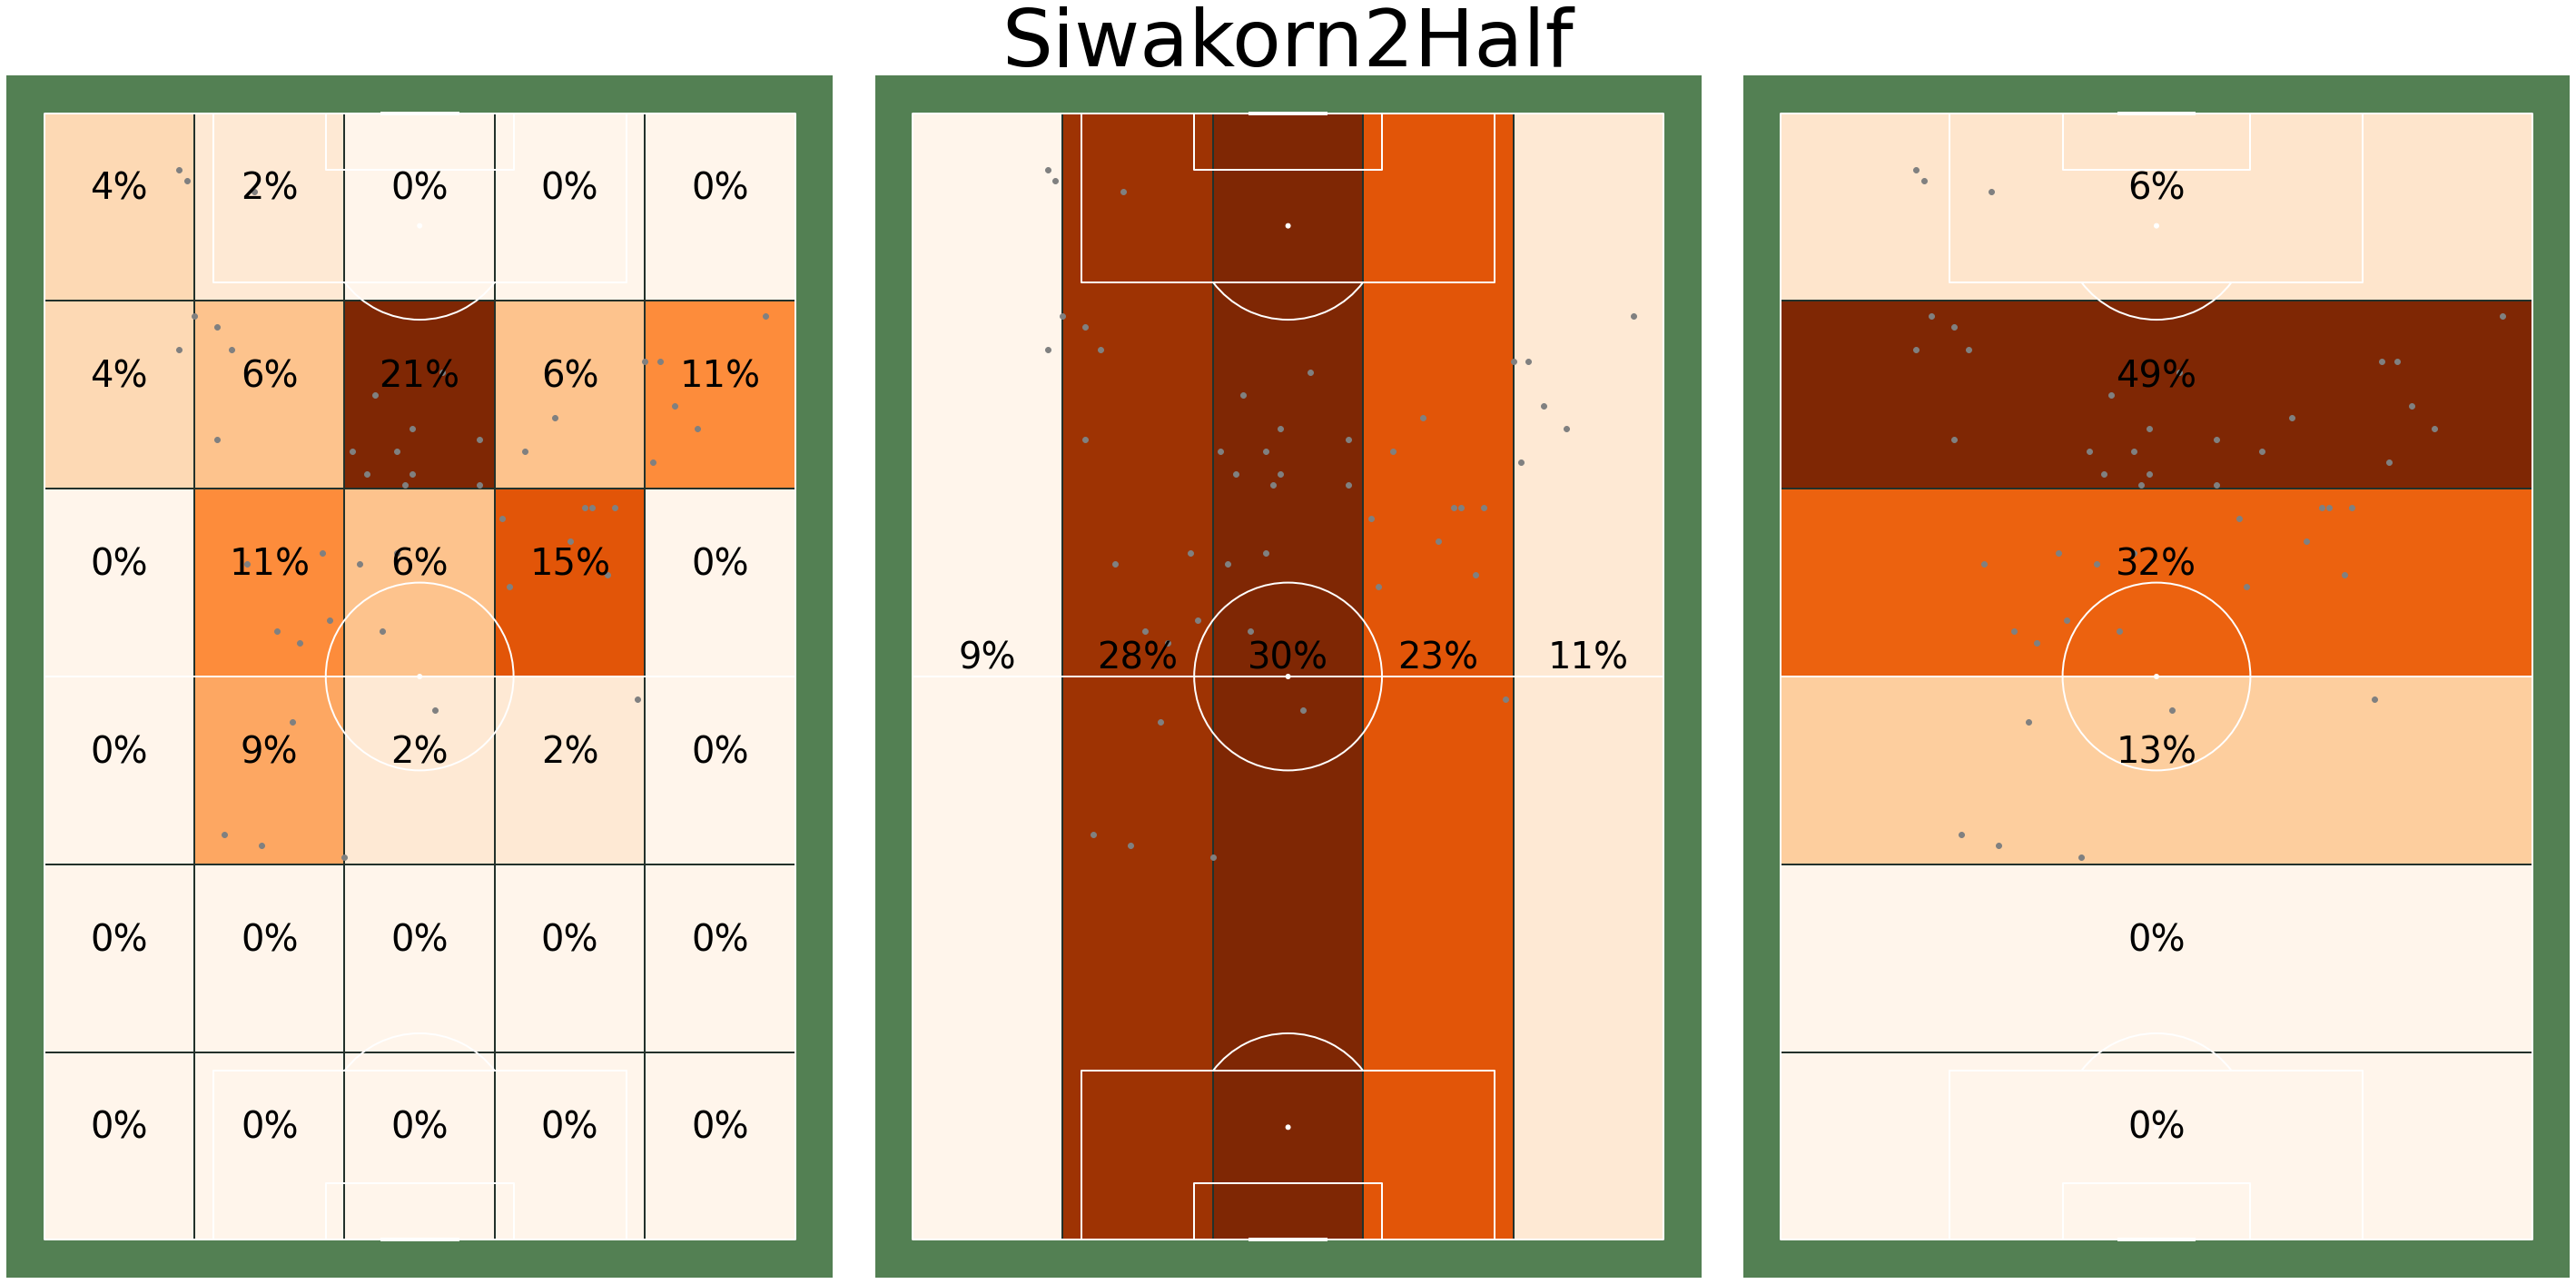

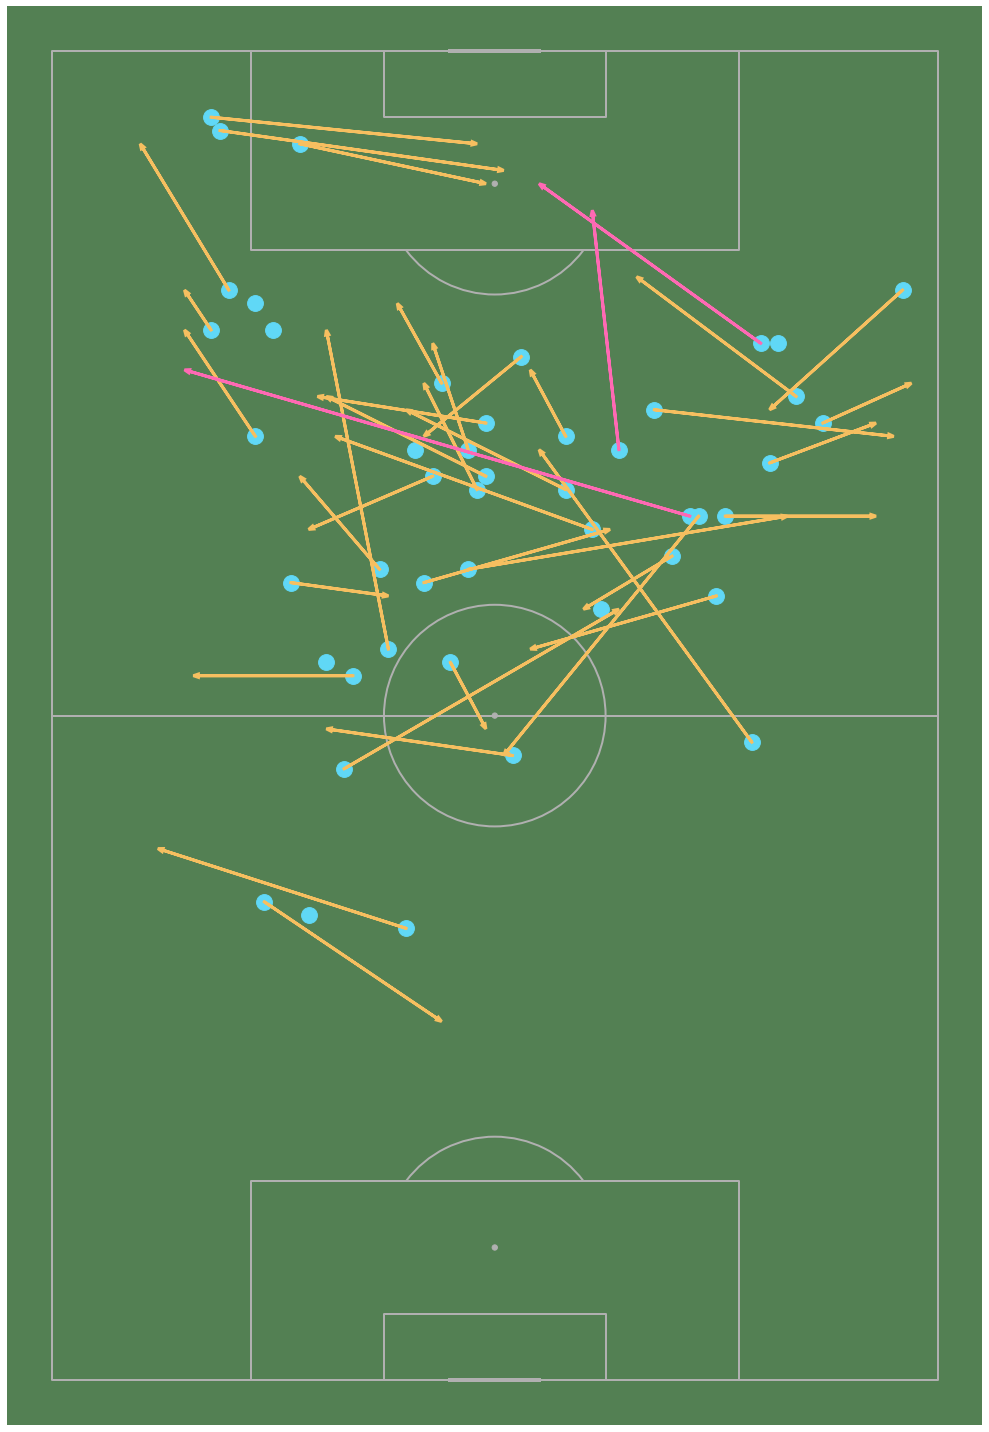

In [67]:
t = kunNar,pailung
mylabels1 = ["Forward", "Back"]
mylabels = ["Success", "Fail"]
colors = ( "#6FC7F0" ,"#F07F8A")
plt.title(Pla + " Passing Direction Style")
plt.pie(t ,startangle = 90, autopct='%1.2f%%', shadow=True,colors = colors, labels = mylabels1)
plt.show()
t = len(pStyp)-pf,pf
colors = ( "#97F0B0","#F07F8A")
plt.title(Pla + " Passing Accuracy")
plt.pie(t ,startangle = 90, autopct='%1.2f%%', shadow=True,colors = colors, labels = mylabels)
plt.show()
pitch = VerticalPitch(pitch_length=100, pitch_width=100,pitch_color = '#538053',line_zorder=2,line_color="white")
fig,ax =pitch.draw(nrows=1,  ncols=3,figsize =(40,20))

bins=[(6,5),(1,5),(6,1)]
for i ,bin in enumerate(bins):
    binstatistic = pitch.bin_statistic( dataPlayer['X'], dataPlayer['Y'],statistic='count',bins = bin)
    pitch.heatmap(binstatistic,ax=ax[i],cmap="Oranges",edgecolors="#22312b")
    pitch.scatter( dataPlayer['X'], dataPlayer['Y'],c='gray',ax=ax[i],s=35)
    binstatistic['statistic'] = (pd.DataFrame((binstatistic['statistic']/binstatistic['statistic'].sum()))
                                 .applymap(lambda x: '{:.0%}'.format(x)).values)
    pitch.label_heatmap(binstatistic,color='black',fontsize =40,ax=ax[i],ha='center',va='bottom')
if(seta == 0):
    title = fig.suptitle(Pla+ "1Half" ,fontsize = 88)
else:
    title = fig.suptitle(Pla+"2Half" ,fontsize = 88)

pitch = VerticalPitch(pitch_length=100, pitch_width=100
        ,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))


plt.scatter(dataPlayer['Y'],dataPlayer['X'],c='#60D8F6',s = 250 ,marker = 'o')

for i in range(len(pStyp)):
    if(pStyp[i] == 'Cross'):
        plt.arrow(pDrtyp[i],pDrtxp[i],pDesyp[i]-pDrtyp[i],pDesxp[i]-pDrtxp[i], color = '#FF69B4',linewidth =3,head_width = 0.3 ,
                  length_includes_head = 'True')
    if(pStyp[i] == 'Through'):
        plt.arrow(pDrtyp[i],pDrtxp[i],pDesyp[i]-pDrtyp[i],pDesxp[i]-pDrtxp[i], color = '#000000',linewidth =3,head_width = 0.3 ,
                  length_includes_head = 'True')
    if(pStyp[i] == 'Pass'):
         plt.arrow(pDrtyp[i],pDrtxp[i],pDesyp[i]-pDrtyp[i],pDesxp[i]-pDrtxp[i],color ='#F6BF60',linewidth =3,head_width = 0.3 ,
                  length_includes_head = 'True')
    if(pStyp[i] == 'PassFail'):
         plt.arrow(pDrtyp[i],pDrtxp[i],pDesyp[i]-pDrtyp[i],pDesxp[i]-pDrtxp[i],color ='#F0261E',linewidth =3,head_width = 0.3 ,
                  length_includes_head = 'True')


In [125]:
oo = data.Player.unique()

In [126]:
oo

array(['Siwakorn', 'Wasan', 'Phitiwat', 'Brinner', 'Kato', 'Shinnaphat',
       'Sanukran', 'Felipe', 'Sarawut', 'Getterson', 'Apirak'],
      dtype=object)

In [164]:
Pla = "Sarawut"

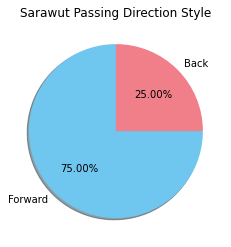

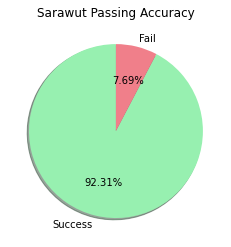

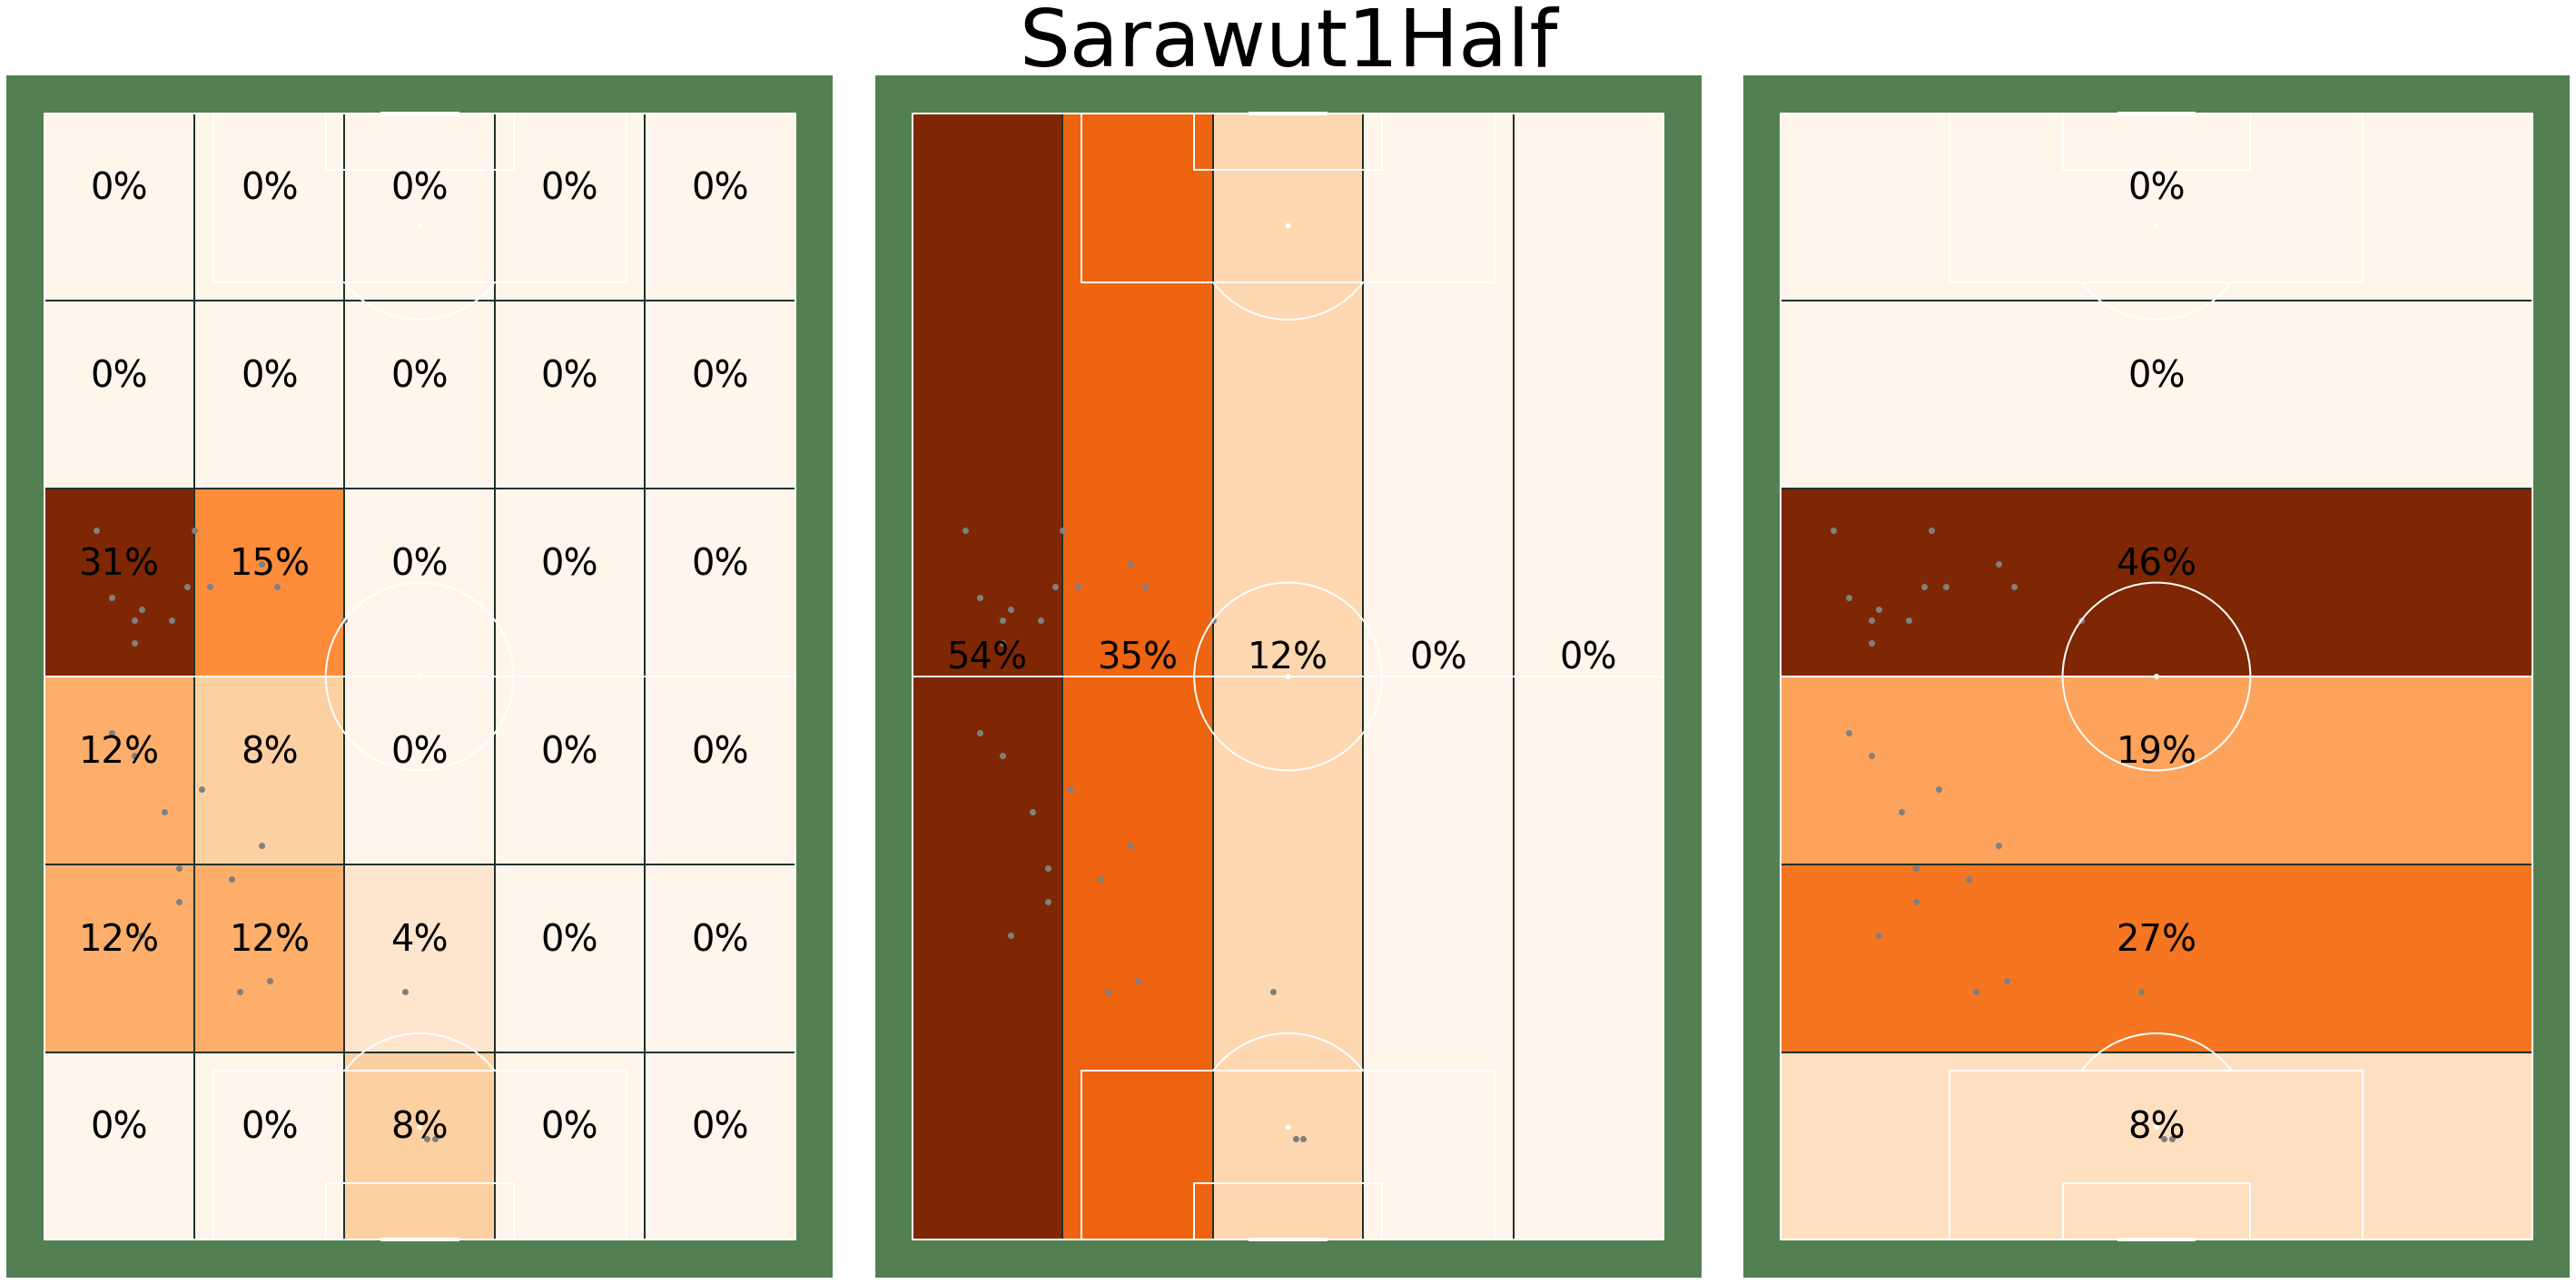

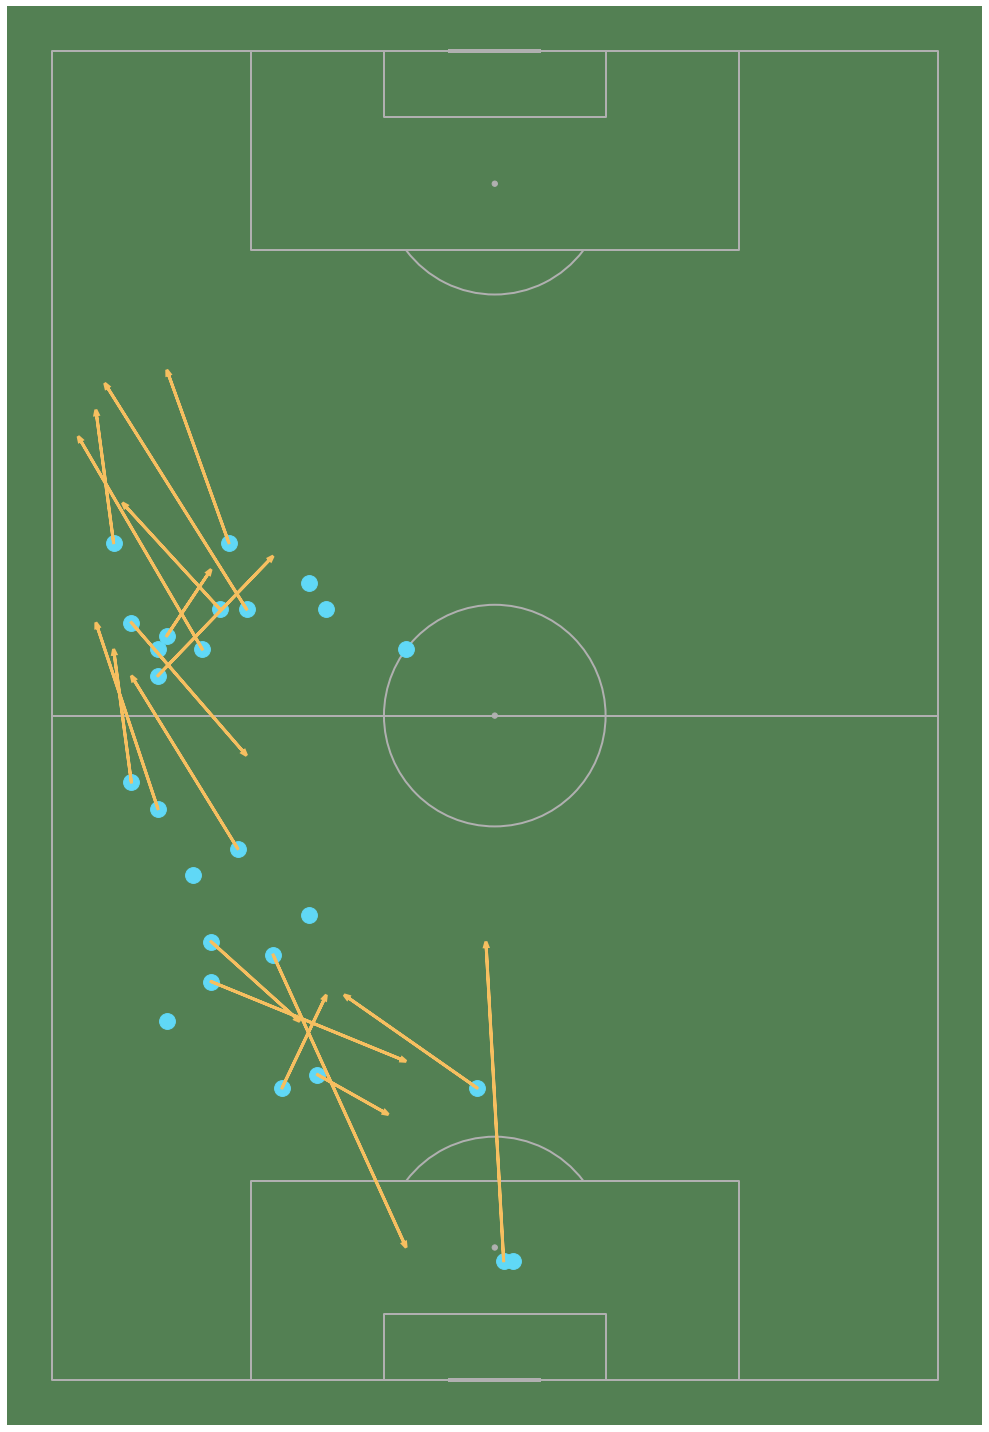

In [165]:
seta = 0
if(seta==0):
    data = pd.read_csv('firsthalf.csv')
else:
    data = pd.read_csv('secoundhalf.csv')
data = data.replace("-",float(0))
if(seta==0):
    data['X'] = data['X']*1.2
    data['Y'] = data['Y']*.8
    data['X2'] =data['X2']*1.2
    data['Y2'] = data['Y2']*.8
else:
    data['X'] = 120-data['X']*1.2
    data['Y'] = 80-data['Y']*.8
    data['X2'] = 120-data['X2']*1.2
    data['Y2'] = 80-data['Y2']*.8
if(seta==0):
    data15 = data[(data['Mins'] <= 15 ) ]
    data30 = data[(data['Mins'] <= 30) &(data['Mins'] > 15 ) ]
    data45 = data[(data['Mins'] <= 45 ) &(data['Mins'] > 30 )]
else:
    data15 = data[(data['Mins'] <= 60) &(data['Mins'] > 45 ) ]
    data30 = data[(data['Mins'] <= 75) &(data['Mins'] > 60 ) ]
    data45 = data[(data['Mins'] <= 90 ) &(data['Mins'] > 75 )]
dataShot = data[(data['Event'] == 'ShotOnTarget') |  (data['Event'] == 'ShotOffTarget') |
                         (data['Event'] == 'ShotGetGoal') | (data['Event'] == 'ShotBlock')]
dataShot= dataShot.reset_index()
dataPass = data[(data['Event'] == 'Pass') |  (data['Event'] == 'go') |
                         (data['Event'] == 'Passfail') | (data['Event'] == 'Cross')|  (data['Event'] == 'Assist')]
dataPass15 = data15[(data15['Event'] == 'Pass') |  (data15['Event'] == 'go') |
                         (data15['Event'] == 'Passfail') | (data15['Event'] == 'Cross')|  (data15['Event'] == 'Assist')]
dataPass30 = data30[(data30['Event'] == 'Pass') |  (data30['Event'] == 'go') |
                         (data30['Event'] == 'Passfail') | (data30['Event'] == 'Cross')|  (data30['Event'] == 'Assist')]
dataPass45 = data45[(data45['Event'] == 'Pass') |  (data45['Event'] == 'go') |
                         (data45['Event'] == 'Passfail') | (data45['Event'] == 'Cross')|  (data45['Event'] == 'Assist')]
dataPass = dataPass.reset_index()
dataPass15 = dataPass15.reset_index()
dataPass30 = dataPass30.reset_index()
dataPass45 = dataPass45.reset_index()
dataPlayer = data[(data['Player'] == Pla) ]
dataPlayer= dataPlayer.reset_index()
pDrtxp = dataPlayer['X']
pDrtyp = dataPlayer['Y']
pDesxp = dataPlayer['X2']
pDesyp = dataPlayer['Y2']
pStyp = dataPlayer['Event']
kunNar =0
pailung = 0
pf = 0
for j in range(len(pStyp)):
    if(pDrtxp[j] > pDesxp[j]):
        if(pDesxp[j] >0):
             pailung += 1
    if(pDrtxp[j] < pDesxp[j] ):
        kunNar += 1
for j in range(len(pStyp)):
    if(pStyp[j] == 'Passfail'):
        pf +=1
t = kunNar,pailung
mylabels1 = ["Forward", "Back"]
mylabels = ["Success", "Fail"]
colors = ( "#6FC7F0" ,"#F07F8A")
plt.title(Pla + " Passing Direction Style")
plt.pie(t ,startangle = 90, autopct='%1.2f%%', shadow=True,colors = colors, labels = mylabels1)
plt.show()
t = len(pStyp)-pf,pf
colors = ( "#97F0B0","#F07F8A")
plt.title(Pla + " Passing Accuracy")
plt.pie(t ,startangle = 90, autopct='%1.2f%%', shadow=True,colors = colors, labels = mylabels)
plt.show()
pitch = VerticalPitch(pitch_length=100, pitch_width=100,pitch_color = '#538053',line_zorder=2,line_color="white")
fig,ax =pitch.draw(nrows=1,  ncols=3,figsize =(40,20))

bins=[(6,5),(1,5),(6,1)]
for i ,bin in enumerate(bins):
    binstatistic = pitch.bin_statistic( dataPlayer['X'], dataPlayer['Y'],statistic='count',bins = bin)
    pitch.heatmap(binstatistic,ax=ax[i],cmap="Oranges",edgecolors="#22312b")
    pitch.scatter( dataPlayer['X'], dataPlayer['Y'],c='gray',ax=ax[i],s=35)
    binstatistic['statistic'] = (pd.DataFrame((binstatistic['statistic']/binstatistic['statistic'].sum()))
                                 .applymap(lambda x: '{:.0%}'.format(x)).values)
    pitch.label_heatmap(binstatistic,color='black',fontsize =40,ax=ax[i],ha='center',va='bottom')
if(seta == 0):
    title = fig.suptitle(Pla+ "1Half" ,fontsize = 88)
else:
    title = fig.suptitle(Pla+"2Half" ,fontsize = 88)

pitch = VerticalPitch(pitch_length=100, pitch_width=100
        ,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))


plt.scatter(dataPlayer['Y'],dataPlayer['X'],c='#60D8F6',s = 250 ,marker = 'o')

for i in range(len(pStyp)):
    if(pStyp[i] == 'Cross'):
        plt.arrow(pDrtyp[i],pDrtxp[i],pDesyp[i]-pDrtyp[i],pDesxp[i]-pDrtxp[i], color = '#FF69B4',linewidth =3,head_width = 0.3 ,
                  length_includes_head = 'True')
    if(pStyp[i] == 'Through'):
        plt.arrow(pDrtyp[i],pDrtxp[i],pDesyp[i]-pDrtyp[i],pDesxp[i]-pDrtxp[i], color = '#000000',linewidth =3,head_width = 0.3 ,
                  length_includes_head = 'True')
    if(pStyp[i] == 'Pass'):
         plt.arrow(pDrtyp[i],pDrtxp[i],pDesyp[i]-pDrtyp[i],pDesxp[i]-pDrtxp[i],color ='#F6BF60',linewidth =3,head_width = 0.3 ,
                  length_includes_head = 'True')
    if(pStyp[i] == 'PassFail'):
         plt.arrow(pDrtyp[i],pDrtxp[i],pDesyp[i]-pDrtyp[i],pDesxp[i]-pDrtxp[i],color ='#F0261E',linewidth =3,head_width = 0.3 ,
                  length_includes_head = 'True')

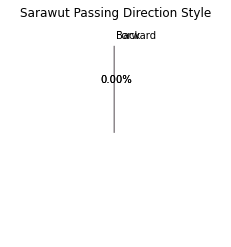

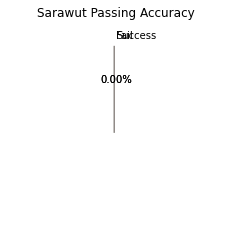

<ipython-input-166-9e940b57fb92>:79: RuntimeWarning: invalid value encountered in true_divide
  binstatistic['statistic'] = (pd.DataFrame((binstatistic['statistic']/binstatistic['statistic'].sum()))


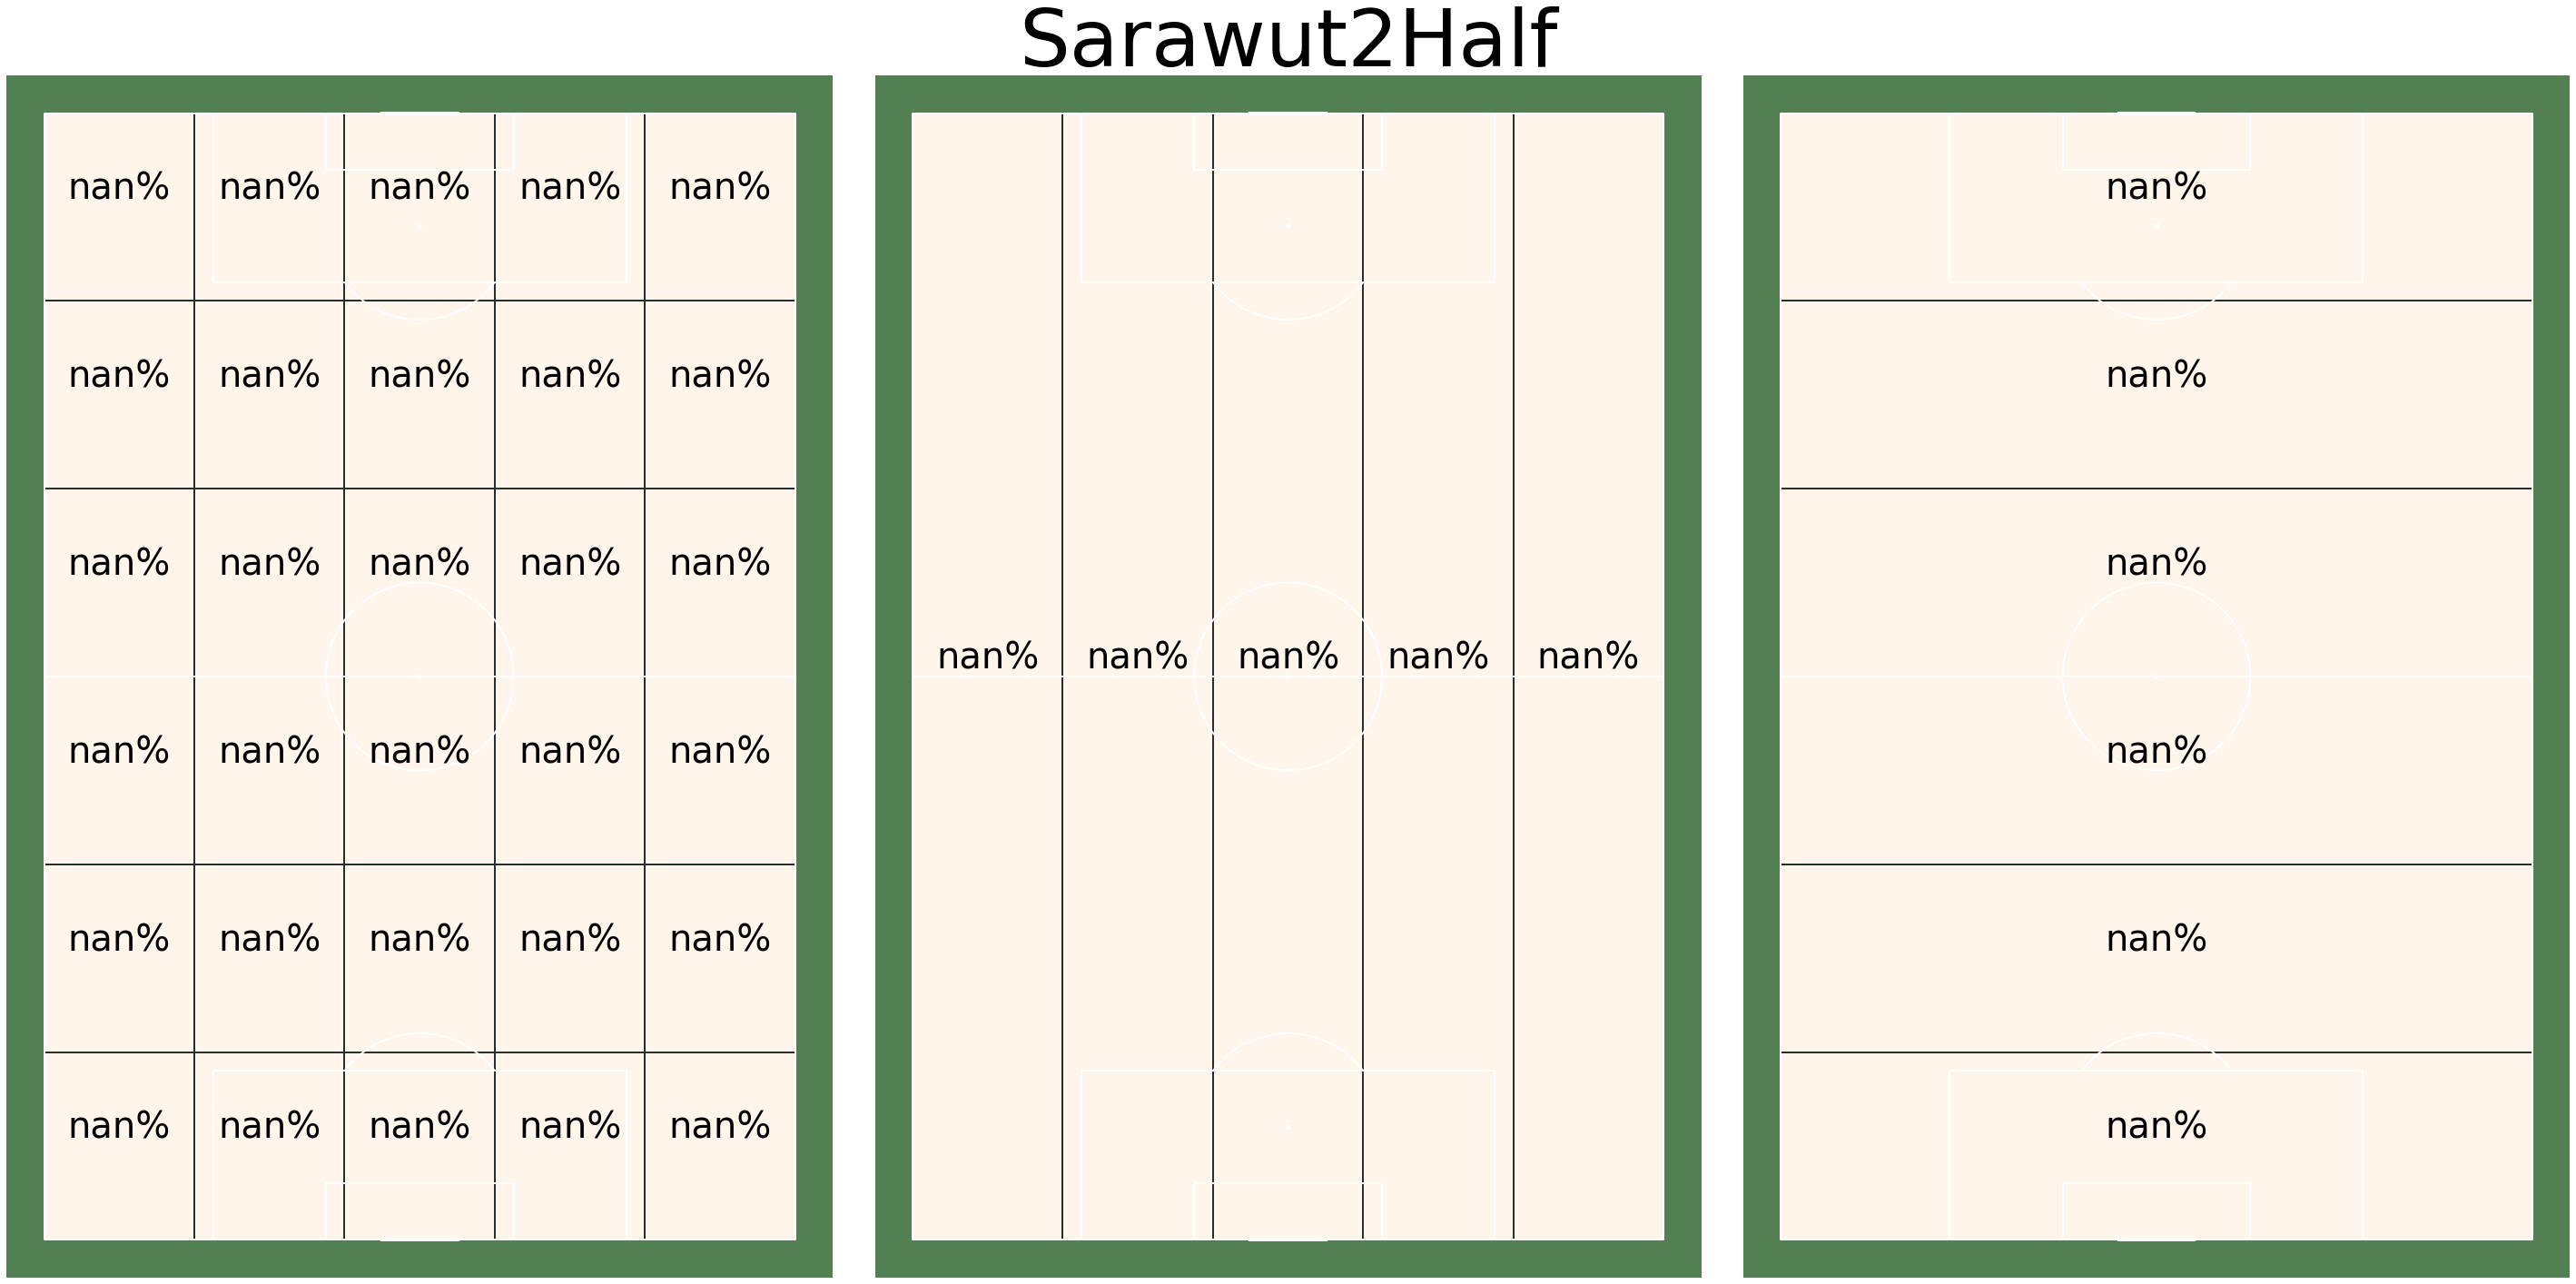

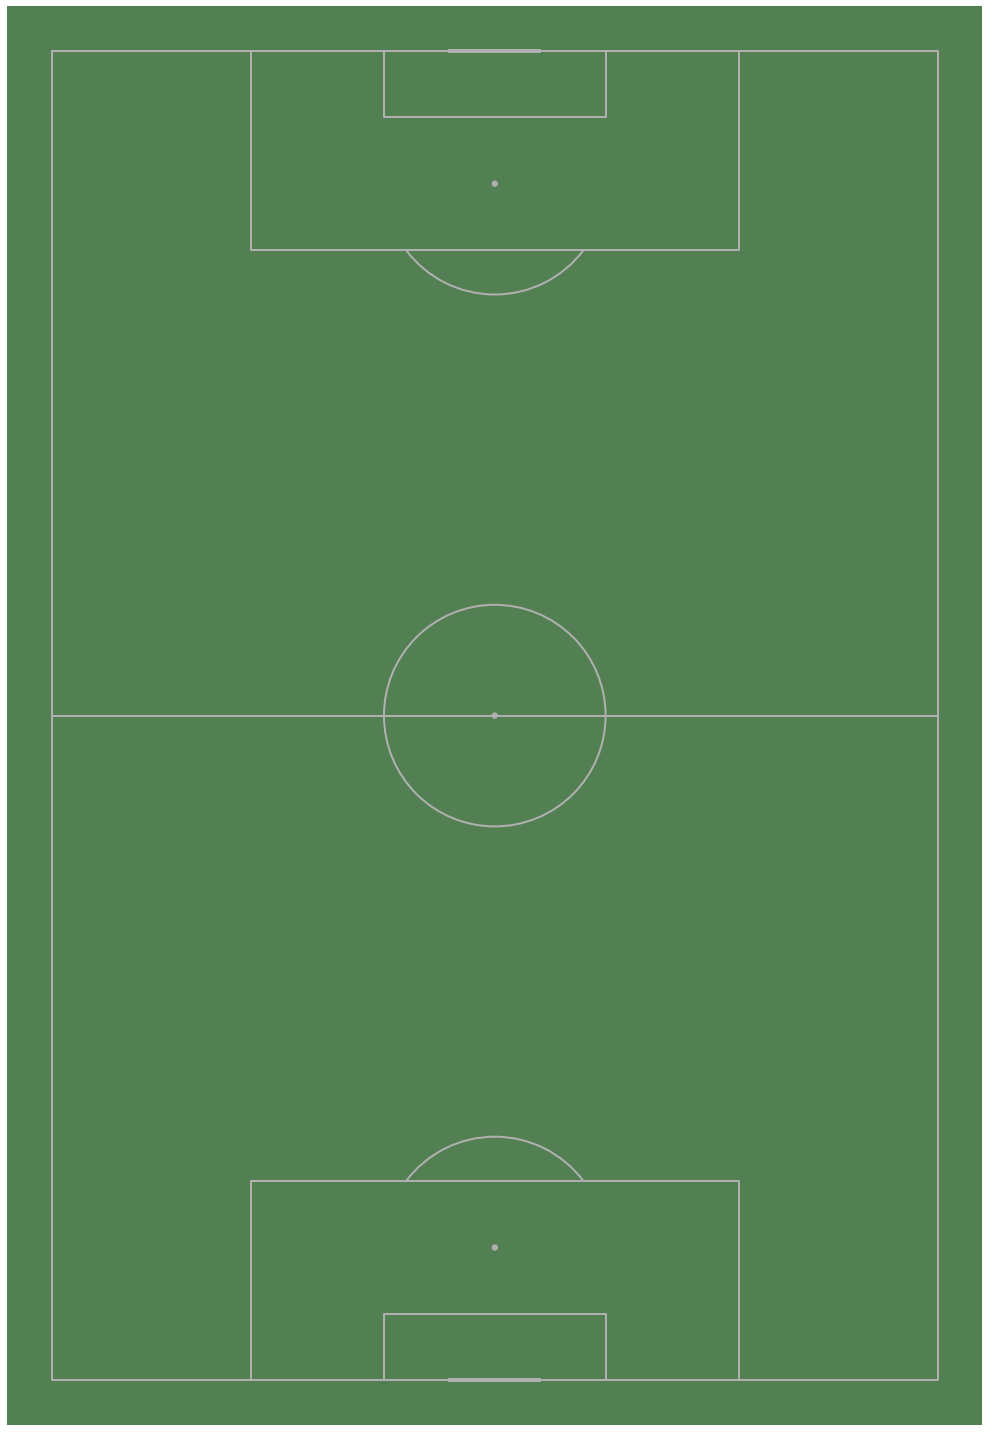

In [166]:
seta = 1
if(seta==0):
    data = pd.read_csv('firsthalf.csv')
else:
    data = pd.read_csv('secoundhalf.csv')
data = data.replace("-",float(0))
if(seta==0):
    data['X'] = data['X']*1.2
    data['Y'] = data['Y']*.8
    data['X2'] =data['X2']*1.2
    data['Y2'] = data['Y2']*.8
else:
    data['X'] = 120-data['X']*1.2
    data['Y'] = 80-data['Y']*.8
    data['X2'] = 120-data['X2']*1.2
    data['Y2'] = 80-data['Y2']*.8
if(seta==0):
    data15 = data[(data['Mins'] <= 15 ) ]
    data30 = data[(data['Mins'] <= 30) &(data['Mins'] > 15 ) ]
    data45 = data[(data['Mins'] <= 45 ) &(data['Mins'] > 30 )]
else:
    data15 = data[(data['Mins'] <= 60) &(data['Mins'] > 45 ) ]
    data30 = data[(data['Mins'] <= 75) &(data['Mins'] > 60 ) ]
    data45 = data[(data['Mins'] <= 90 ) &(data['Mins'] > 75 )]
dataShot = data[(data['Event'] == 'ShotOnTarget') |  (data['Event'] == 'ShotOffTarget') |
                         (data['Event'] == 'ShotGetGoal') | (data['Event'] == 'ShotBlock')]
dataShot= dataShot.reset_index()
dataPass = data[(data['Event'] == 'Pass') |  (data['Event'] == 'go') |
                         (data['Event'] == 'Passfail') | (data['Event'] == 'Cross')|  (data['Event'] == 'Assist')]
dataPass15 = data15[(data15['Event'] == 'Pass') |  (data15['Event'] == 'go') |
                         (data15['Event'] == 'Passfail') | (data15['Event'] == 'Cross')|  (data15['Event'] == 'Assist')]
dataPass30 = data30[(data30['Event'] == 'Pass') |  (data30['Event'] == 'go') |
                         (data30['Event'] == 'Passfail') | (data30['Event'] == 'Cross')|  (data30['Event'] == 'Assist')]
dataPass45 = data45[(data45['Event'] == 'Pass') |  (data45['Event'] == 'go') |
                         (data45['Event'] == 'Passfail') | (data45['Event'] == 'Cross')|  (data45['Event'] == 'Assist')]
dataPass = dataPass.reset_index()
dataPass15 = dataPass15.reset_index()
dataPass30 = dataPass30.reset_index()
dataPass45 = dataPass45.reset_index()
dataPlayer = data[(data['Player'] == Pla) ]
dataPlayer= dataPlayer.reset_index()
pDrtxp = dataPlayer['X']
pDrtyp = dataPlayer['Y']
pDesxp = dataPlayer['X2']
pDesyp = dataPlayer['Y2']
pStyp = dataPlayer['Event']
kunNar =0
pailung = 0
pf = 0
for j in range(len(pStyp)):
    if(pDrtxp[j] > pDesxp[j]):
        if(pDesxp[j] > 0):
            pailung += 1
    if(pDrtxp[j] < pDesxp[j]):
        kunNar += 1
for j in range(len(pStyp)):
    if(pStyp[j] == 'Passfail'):
        pf +=1
t = kunNar,pailung
mylabels1 = ["Forward", "Back"]
mylabels = ["Success", "Fail"]
colors = ( "#6FC7F0" ,"#F07F8A")
plt.title(Pla + " Passing Direction Style")
plt.pie(t ,startangle = 90, autopct='%1.2f%%', shadow=True,colors = colors, labels = mylabels1)
plt.show()
t = len(pStyp)-pf,pf
colors = ( "#97F0B0","#F07F8A")
plt.title(Pla + " Passing Accuracy")
plt.pie(t ,startangle = 90, autopct='%1.2f%%', shadow=True,colors = colors, labels = mylabels)
plt.show()
pitch = VerticalPitch(pitch_length=100, pitch_width=100,pitch_color = '#538053',line_zorder=2,line_color="white")
fig,ax =pitch.draw(nrows=1,  ncols=3,figsize =(40,20))

bins=[(6,5),(1,5),(6,1)]
for i ,bin in enumerate(bins):
    binstatistic = pitch.bin_statistic( dataPlayer['X'], dataPlayer['Y'],statistic='count',bins = bin)
    pitch.heatmap(binstatistic,ax=ax[i],cmap="Oranges",edgecolors="#22312b")
    pitch.scatter( dataPlayer['X'], dataPlayer['Y'],c='gray',ax=ax[i],s=35)
    binstatistic['statistic'] = (pd.DataFrame((binstatistic['statistic']/binstatistic['statistic'].sum()))
                                 .applymap(lambda x: '{:.0%}'.format(x)).values)
    pitch.label_heatmap(binstatistic,color='black',fontsize =40,ax=ax[i],ha='center',va='bottom')
if(seta == 0):
    title = fig.suptitle(Pla+ "1Half" ,fontsize = 88)
else:
    title = fig.suptitle(Pla+"2Half" ,fontsize = 88)

pitch = VerticalPitch(pitch_length=100, pitch_width=100
        ,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))


plt.scatter(dataPlayer['Y'],dataPlayer['X'],c='#60D8F6',s = 250 ,marker = 'o')

for i in range(len(pStyp)):
    if(pStyp[i] == 'Cross'):
        plt.arrow(pDrtyp[i],pDrtxp[i],pDesyp[i]-pDrtyp[i],pDesxp[i]-pDrtxp[i], color = '#FF69B4',linewidth =3,head_width = 0.3 ,
                  length_includes_head = 'True')
    if(pStyp[i] == 'Through'):
        plt.arrow(pDrtyp[i],pDrtxp[i],pDesyp[i]-pDrtyp[i],pDesxp[i]-pDrtxp[i], color = '#000000',linewidth =3,head_width = 0.3 ,
                  length_includes_head = 'True')
    if(pStyp[i] == 'Pass'):
         plt.arrow(pDrtyp[i],pDrtxp[i],pDesyp[i]-pDrtyp[i],pDesxp[i]-pDrtxp[i],color ='#F6BF60',linewidth =3,head_width = 0.3 ,
                  length_includes_head = 'True')
    if(pStyp[i] == 'PassFail'):
         plt.arrow(pDrtyp[i],pDrtxp[i],pDesyp[i]-pDrtyp[i],pDesxp[i]-pDrtxp[i],color ='#F0261E',linewidth =3,head_width = 0.3 ,
                  length_includes_head = 'True')

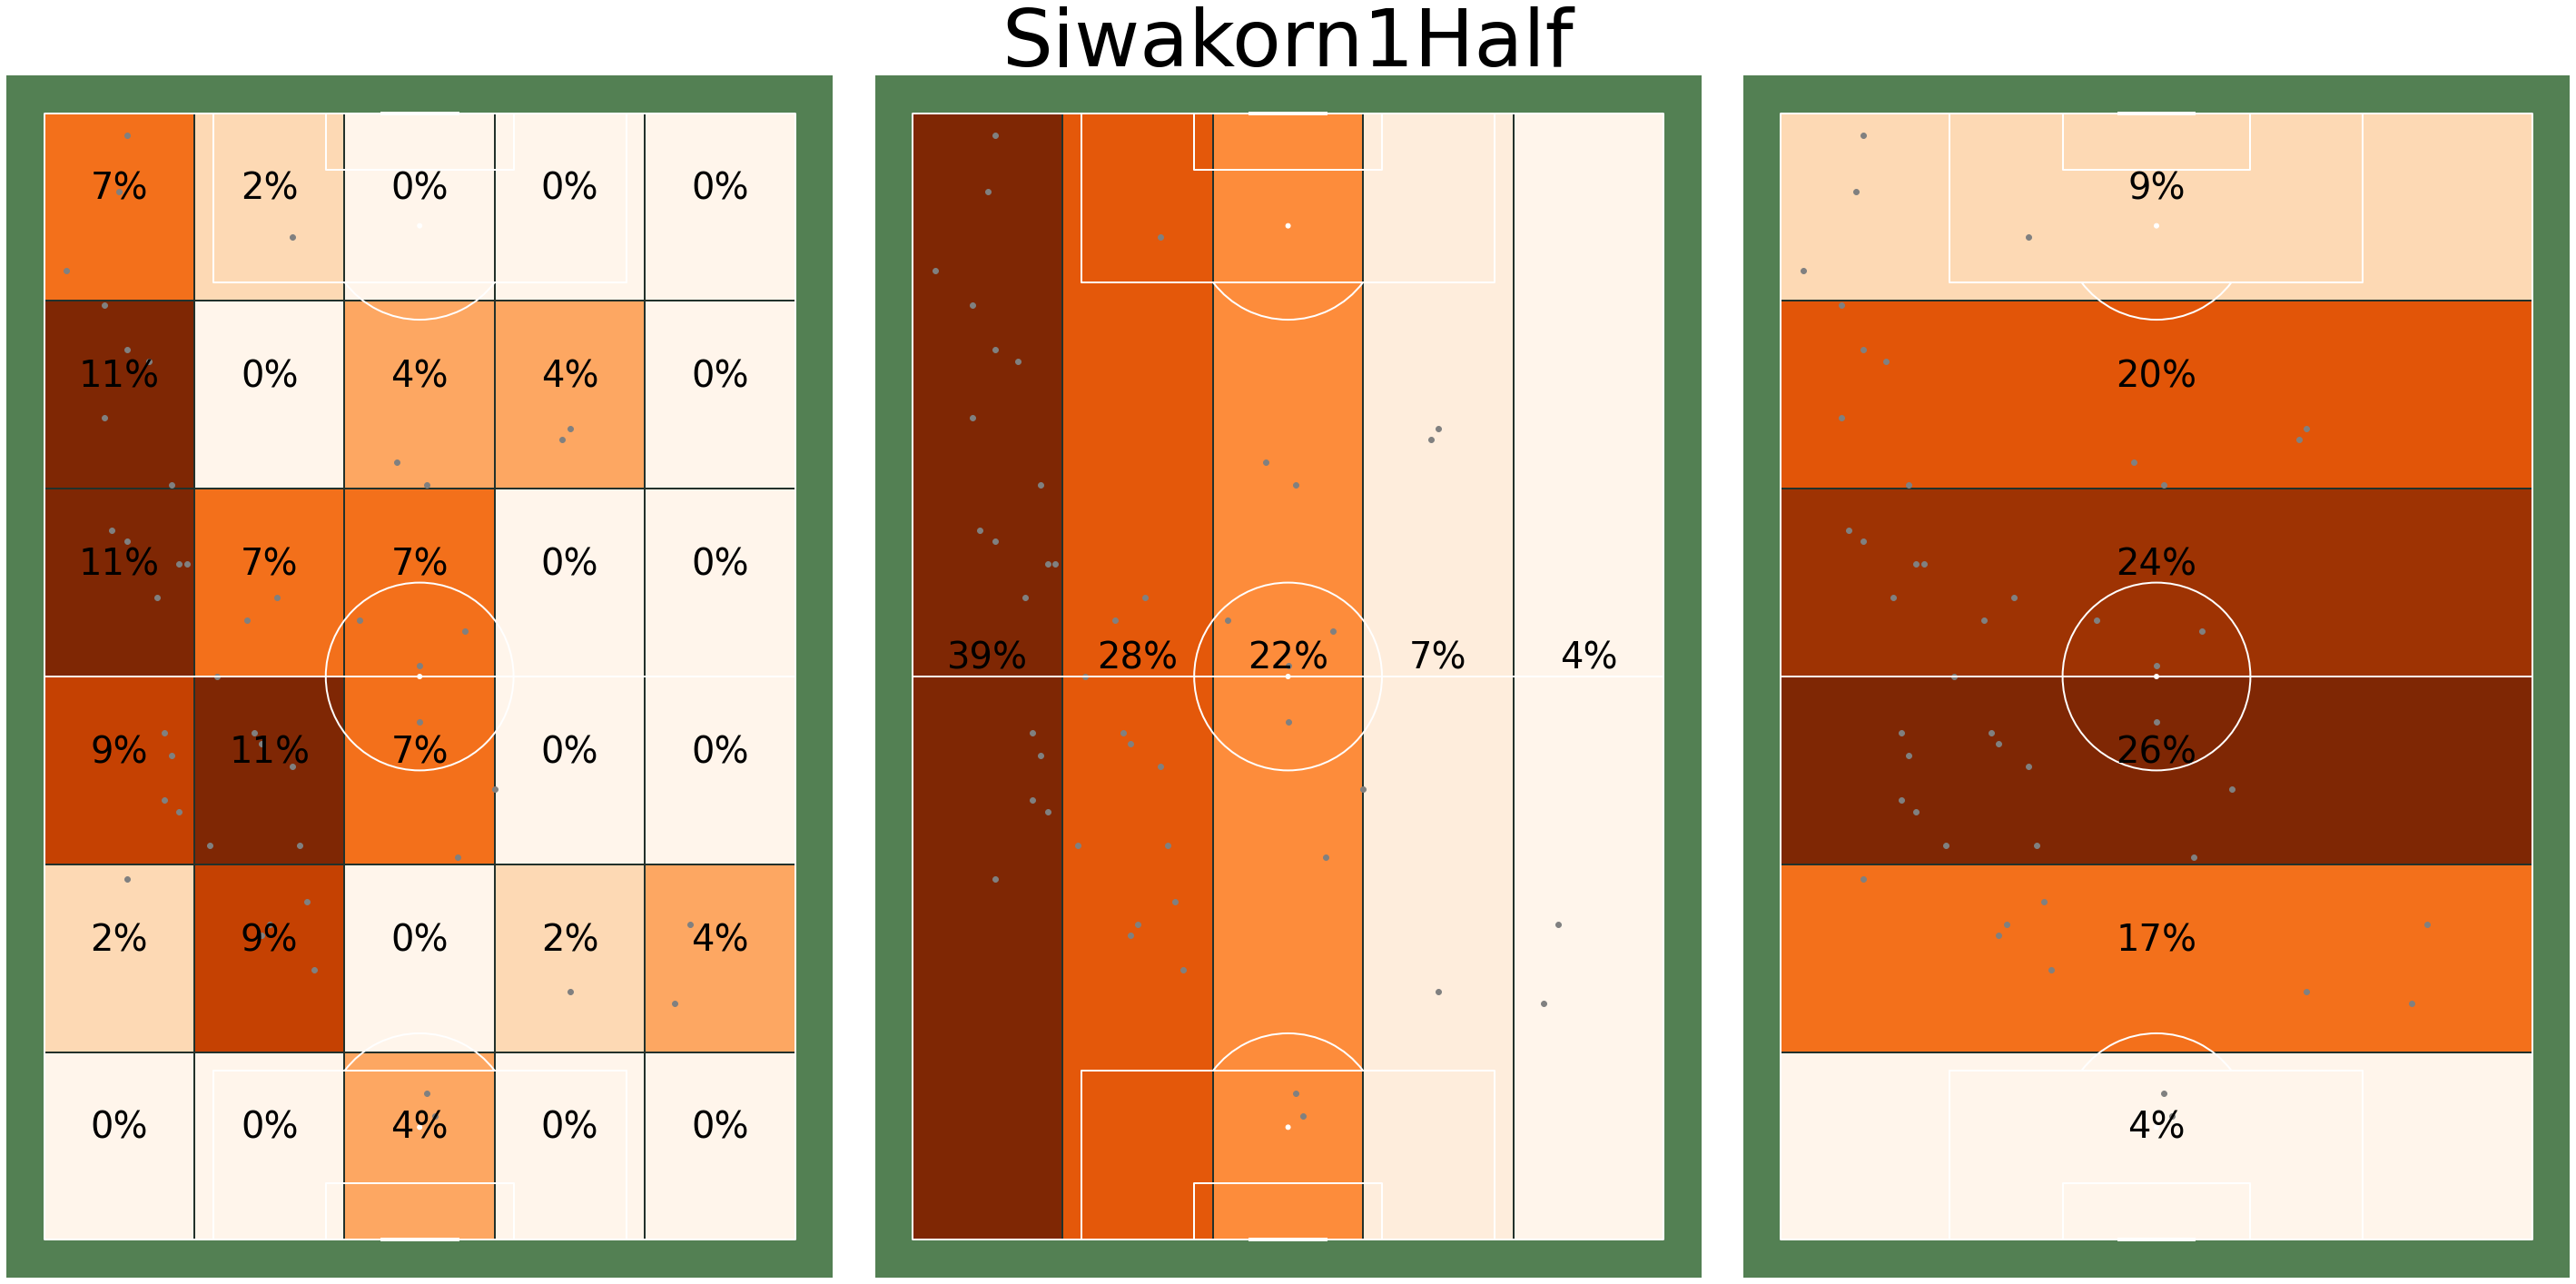

In [57]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,pitch_color = '#538053',line_zorder=2,line_color="white")
fig,ax =pitch.draw(nrows=1,  ncols=3,figsize =(40,20))

bins=[(6,5),(1,5),(6,1)]
for i ,bin in enumerate(bins):
    binstatistic = pitch.bin_statistic( dataPlayer['X'], dataPlayer['Y'],statistic='count',bins = bin)
    pitch.heatmap(binstatistic,ax=ax[i],cmap="Oranges",edgecolors="#22312b")
    pitch.scatter( dataPlayer['X'], dataPlayer['Y'],c='gray',ax=ax[i],s=35)
    binstatistic['statistic'] = (pd.DataFrame((binstatistic['statistic']/binstatistic['statistic'].sum()))
                                 .applymap(lambda x: '{:.0%}'.format(x)).values)
    pitch.label_heatmap(binstatistic,color='black',fontsize =40,ax=ax[i],ha='center',va='bottom')
if(seta == 0):
    title = fig.suptitle(Pla+ "1Half" ,fontsize = 88)
else:
    title = fig.suptitle(Pla+"2Half" ,fontsize = 88)

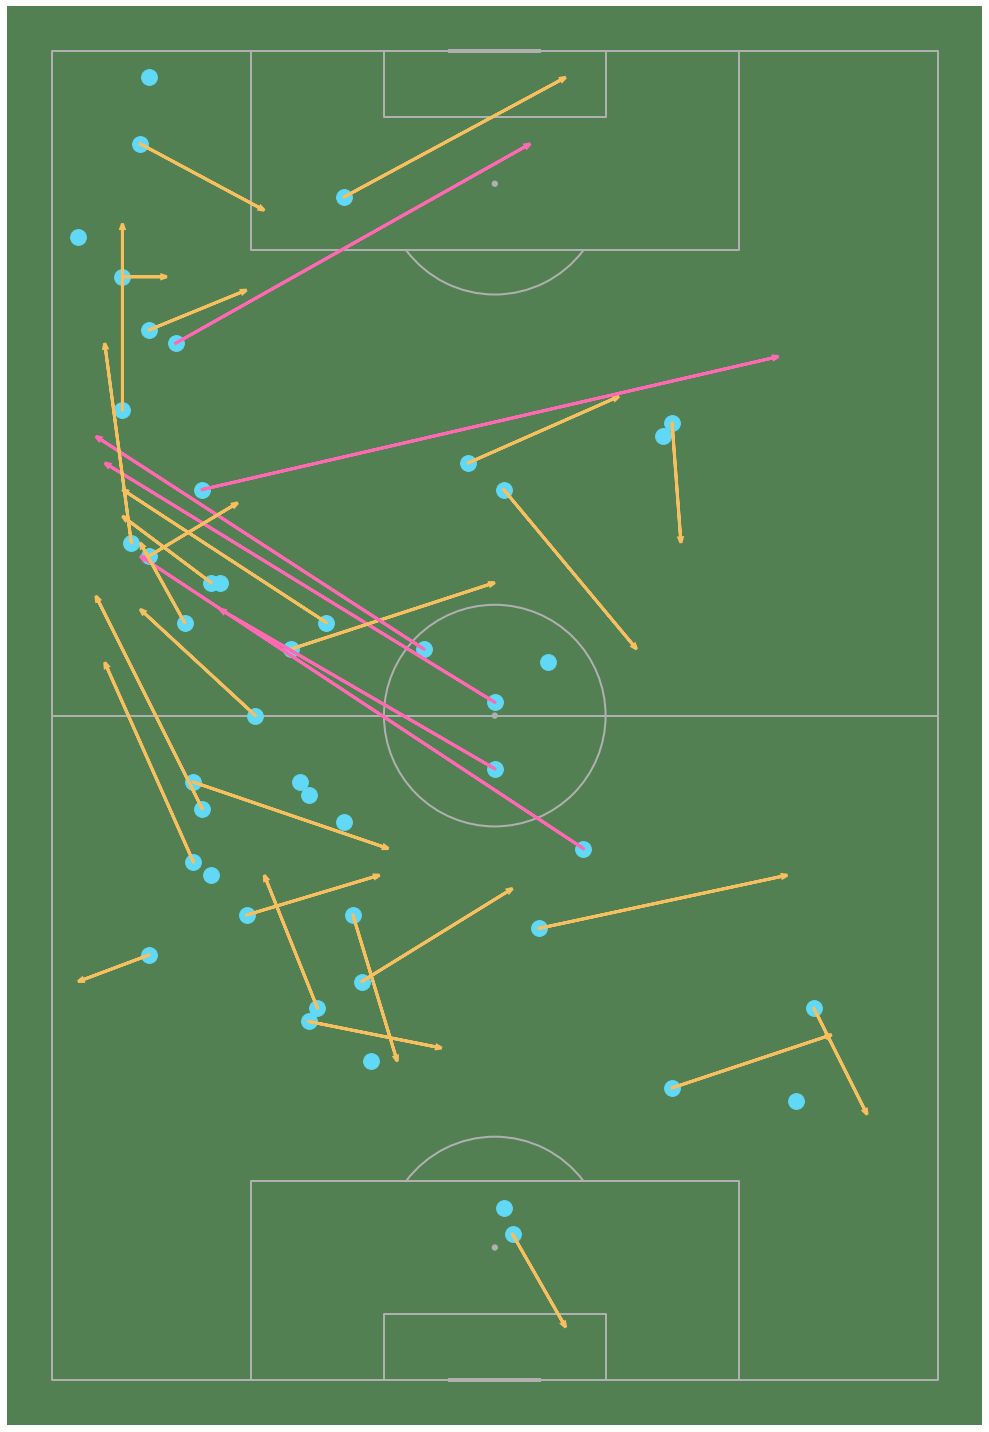

In [58]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100
        ,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))


plt.scatter(dataPlayer['Y'],dataPlayer['X'],c='#60D8F6',s = 250 ,marker = 'o')

for i in range(len(pStyp)):
    if(pStyp[i] == 'Cross'):
        plt.arrow(pDrtyp[i],pDrtxp[i],pDesyp[i]-pDrtyp[i],pDesxp[i]-pDrtxp[i], color = '#FF69B4',linewidth =3,head_width = 0.3 ,
                  length_includes_head = 'True')
    if(pStyp[i] == 'Through'):
        plt.arrow(pDrtyp[i],pDrtxp[i],pDesyp[i]-pDrtyp[i],pDesxp[i]-pDrtxp[i], color = '#000000',linewidth =3,head_width = 0.3 ,
                  length_includes_head = 'True')
    if(pStyp[i] == 'Pass'):
         plt.arrow(pDrtyp[i],pDrtxp[i],pDesyp[i]-pDrtyp[i],pDesxp[i]-pDrtxp[i],color ='#F6BF60',linewidth =3,head_width = 0.3 ,
                  length_includes_head = 'True')
    if(pStyp[i] == 'PassFail'):
         plt.arrow(pDrtyp[i],pDrtxp[i],pDesyp[i]-pDrtyp[i],pDesxp[i]-pDrtxp[i],color ='#F0261E',linewidth =3,head_width = 0.3 ,
                  length_includes_head = 'True')

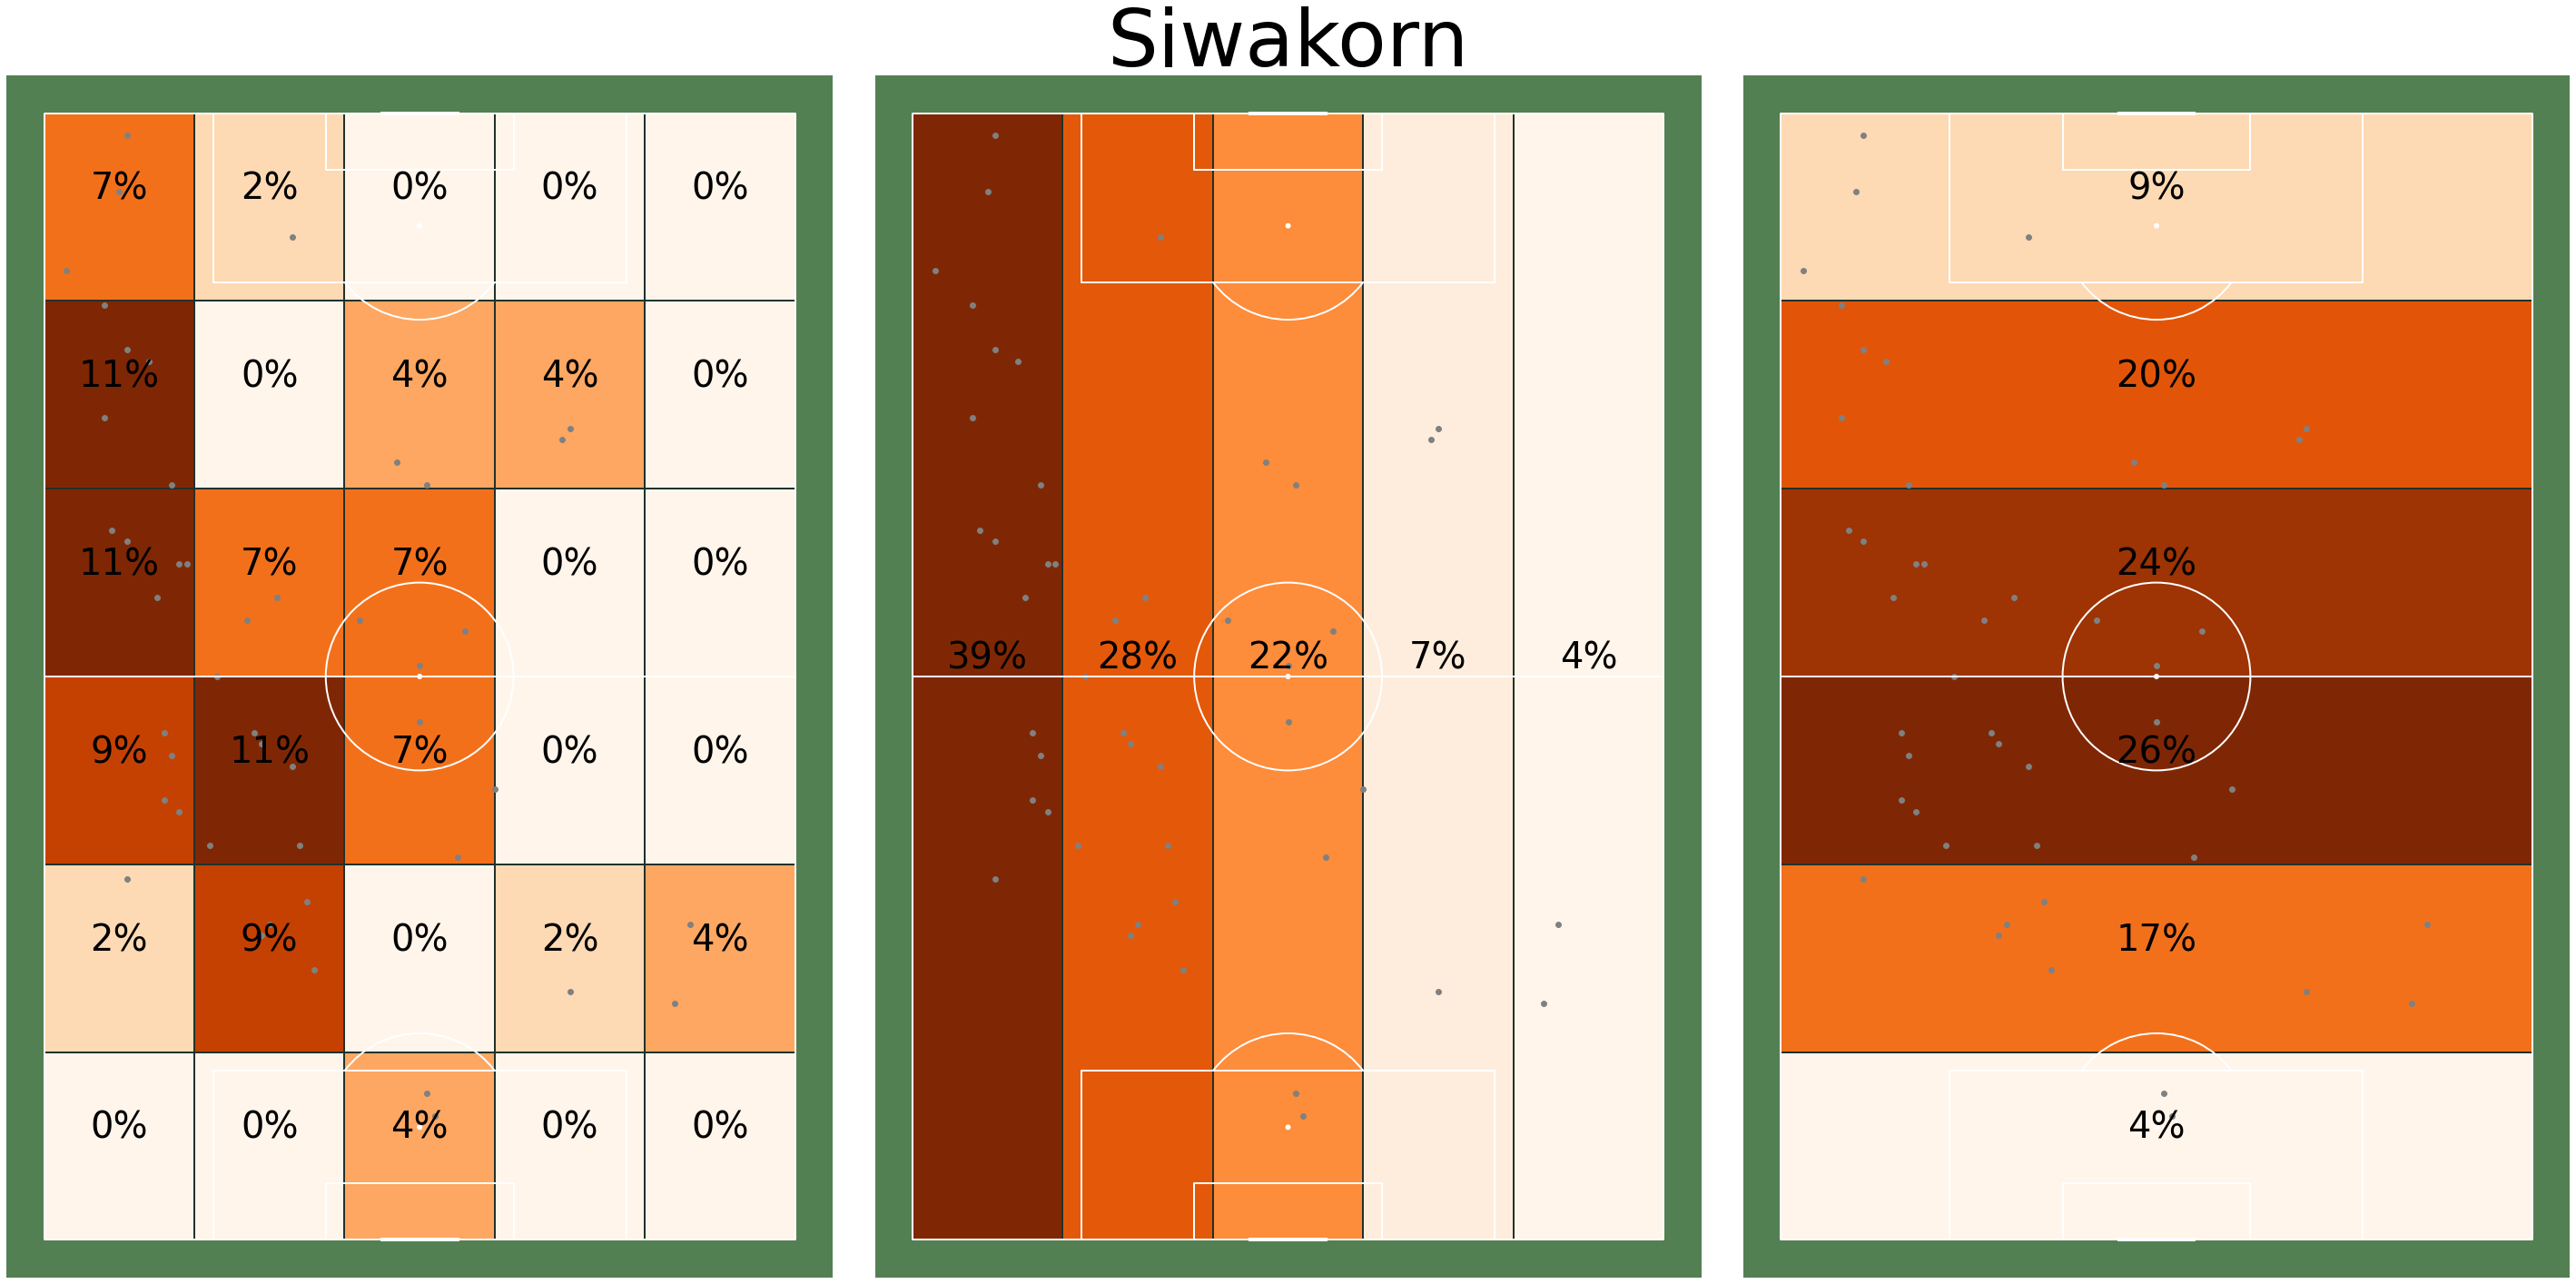

In [59]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100,pitch_color = '#538053',line_zorder=2,line_color="white")
fig,ax =pitch.draw(nrows=1,  ncols=3,figsize =(40,20))

bins=[(6,5),(1,5),(6,1)]
for i ,bin in enumerate(bins):
    binstatistic = pitch.bin_statistic( dataPlayer['X'], dataPlayer['Y'],statistic='count',bins = bin)
    pitch.heatmap(binstatistic,ax=ax[i],cmap="Oranges",edgecolors="#22312b")
    pitch.scatter( dataPlayer['X'], dataPlayer['Y'],c='gray',ax=ax[i],s=35)
    binstatistic['statistic'] = (pd.DataFrame((binstatistic['statistic']/binstatistic['statistic'].sum()))
                                 .applymap(lambda x: '{:.0%}'.format(x)).values)
    pitch.label_heatmap(binstatistic,color='black',fontsize =40,ax=ax[i],ha='center',va='bottom')
if(seta == 0):
    title = fig.suptitle(Pla ,fontsize = 88)
else:
    title = fig.suptitle(Pla ,fontsize = 88)

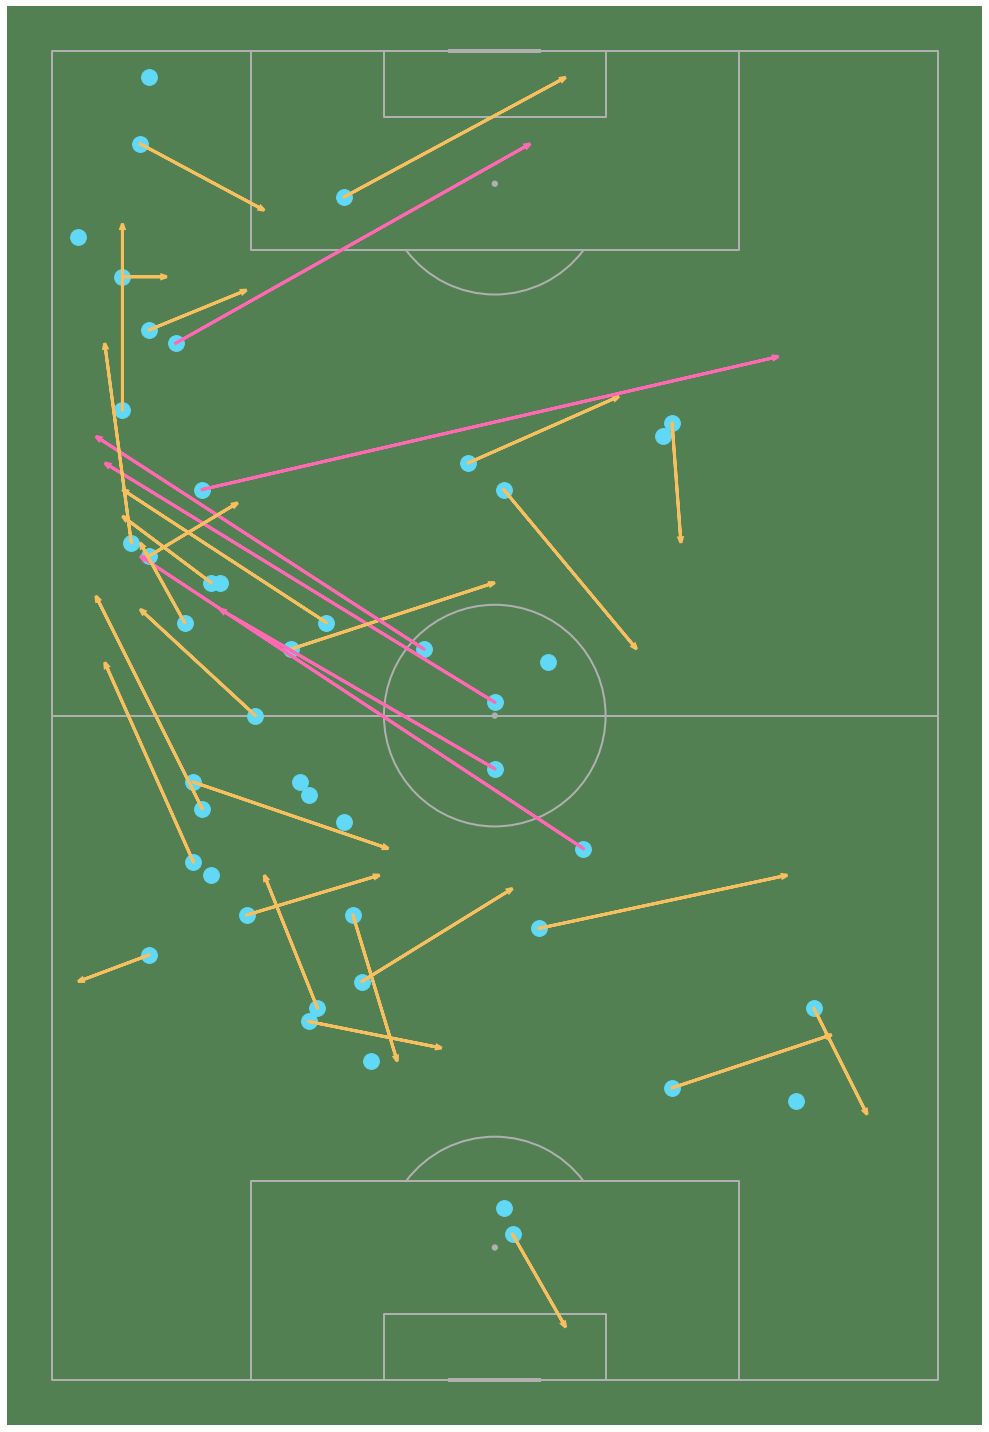

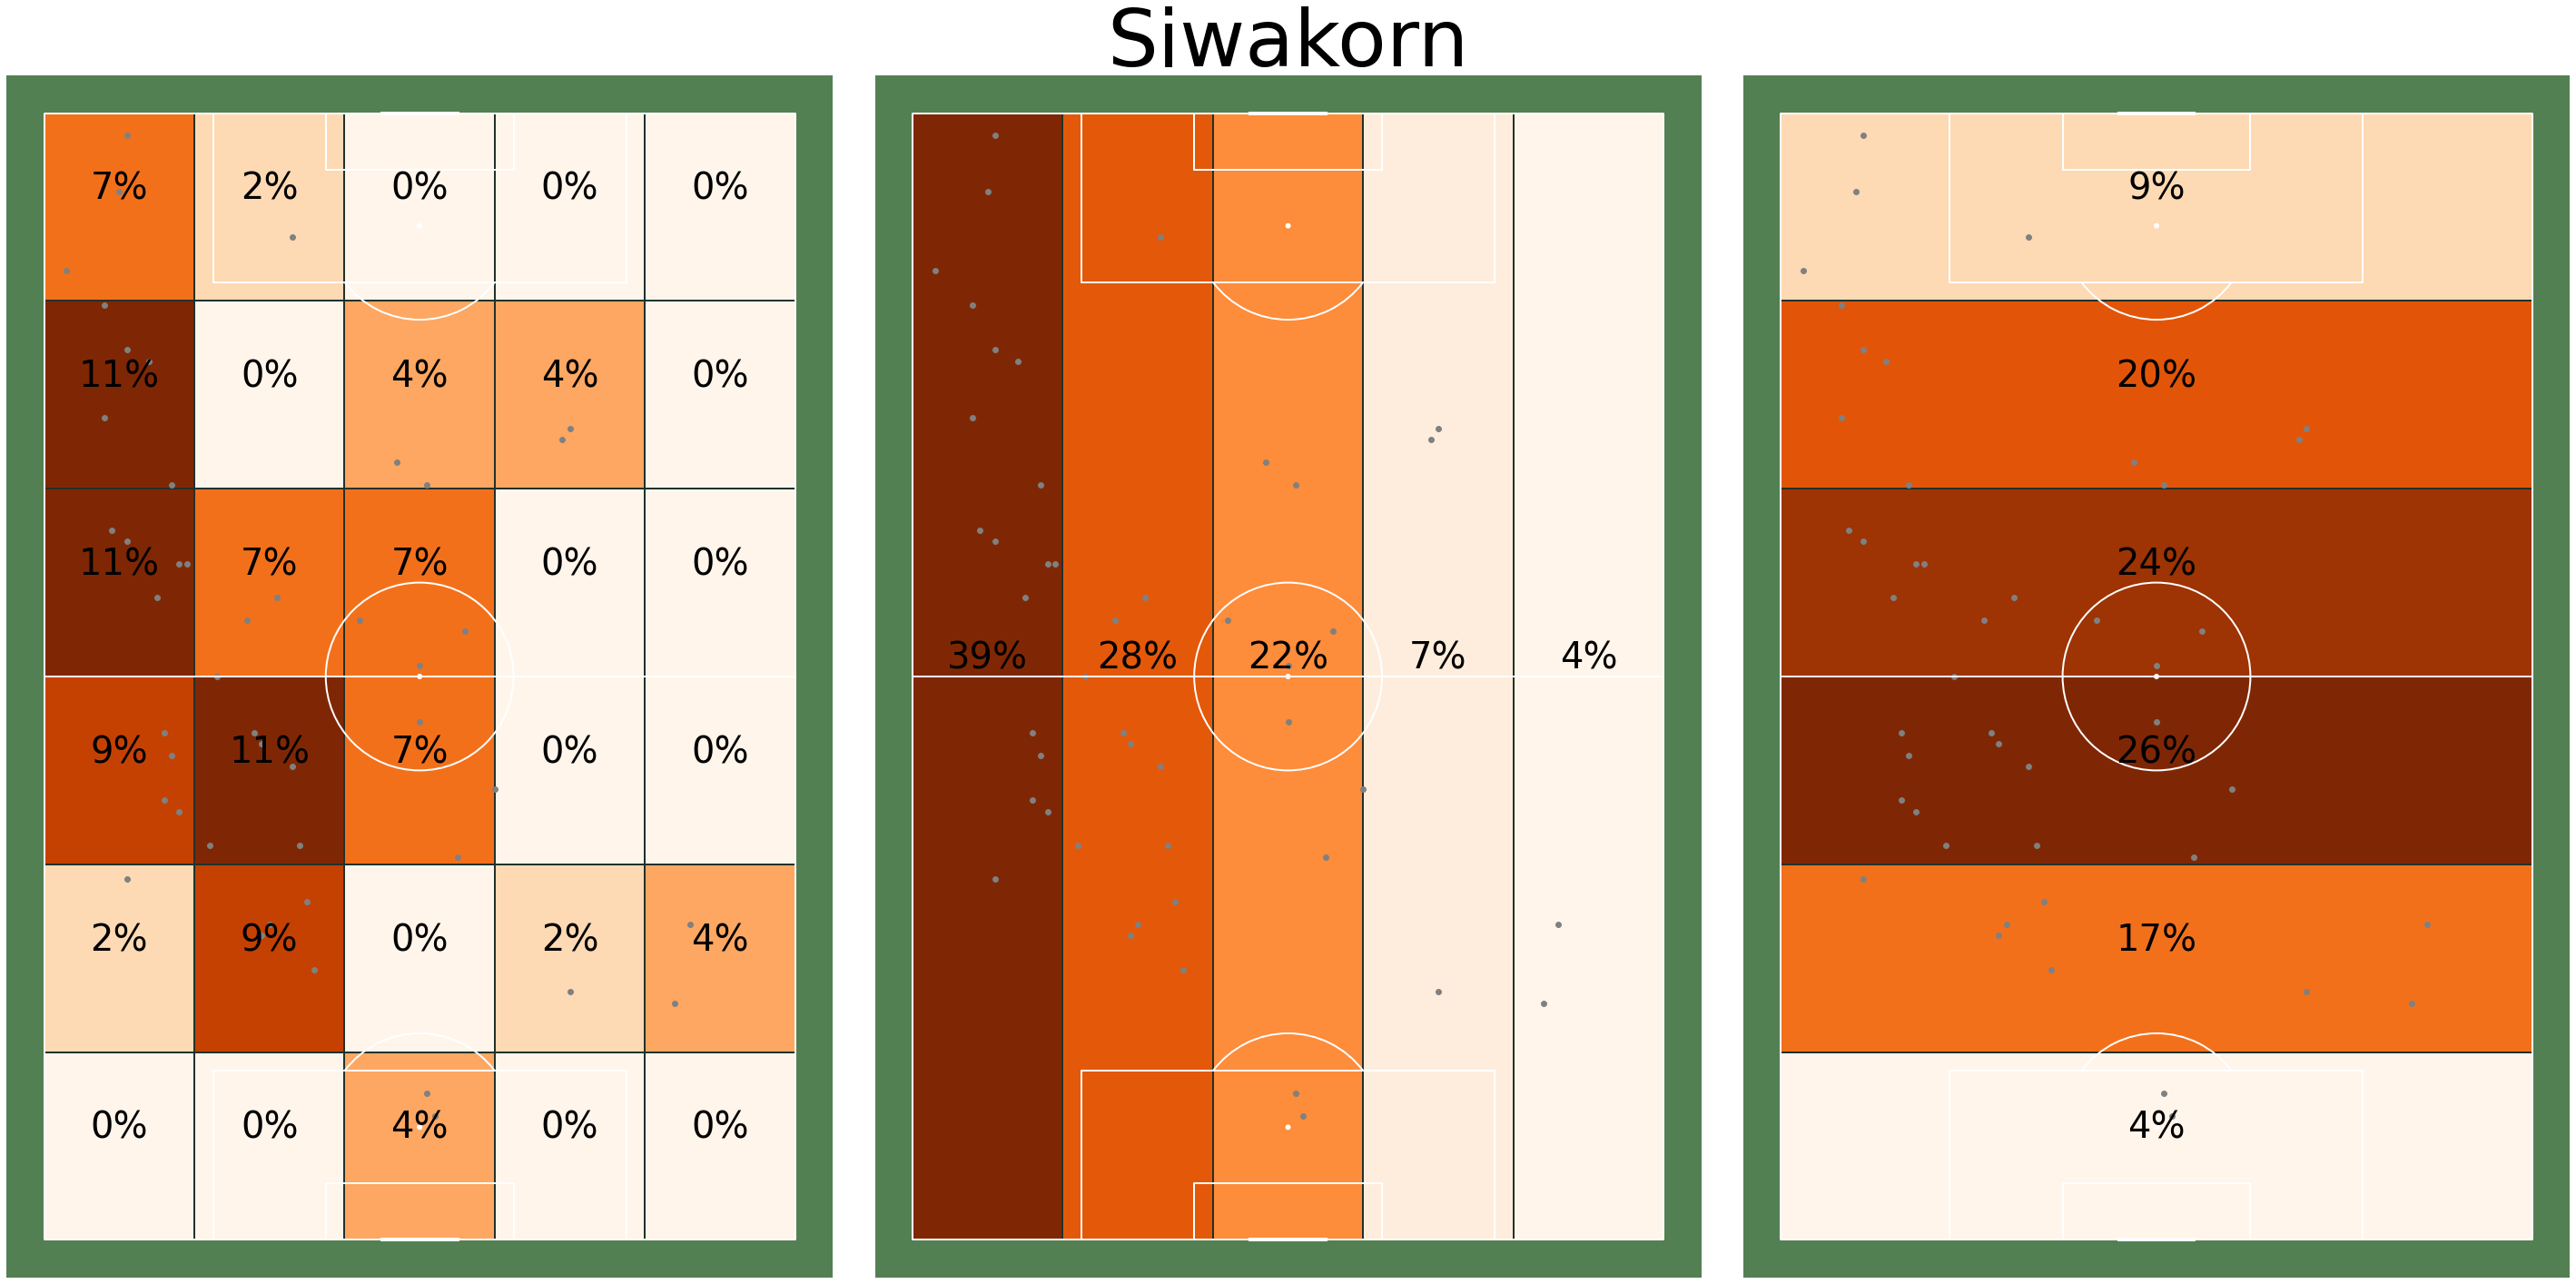

In [60]:
pitch = VerticalPitch(pitch_length=100, pitch_width=100
        ,pitch_color = '#538053',half=False)
fig,ax =pitch.draw(figsize =(40,20))


plt.scatter(dataPlayer['Y'],dataPlayer['X'],c='#60D8F6',s = 250 ,marker = 'o')

for i in range(len(pStyp)):
    if(pStyp[i] == 'Cross'):
        plt.arrow(pDrtyp[i],pDrtxp[i],pDesyp[i]-pDrtyp[i],pDesxp[i]-pDrtxp[i], color = '#FF69B4',linewidth =3,head_width = 0.3 ,
                  length_includes_head = 'True')
    if(pStyp[i] == 'Through'):
        plt.arrow(pDrtyp[i],pDrtxp[i],pDesyp[i]-pDrtyp[i],pDesxp[i]-pDrtxp[i], color = '#000000',linewidth =3,head_width = 0.3 ,
                  length_includes_head = 'True')
    if(pStyp[i] == 'Pass'):
         plt.arrow(pDrtyp[i],pDrtxp[i],pDesyp[i]-pDrtyp[i],pDesxp[i]-pDrtxp[i],color ='#F6BF60',linewidth =3,head_width = 0.3 ,
                  length_includes_head = 'True')
    if(pStyp[i] == 'PassFail'):
         plt.arrow(pDrtyp[i],pDrtxp[i],pDesyp[i]-pDrtyp[i],pDesxp[i]-pDrtxp[i],color ='#F0261E',linewidth =3,head_width = 0.3 ,
                  length_includes_head = 'True')
pitch = VerticalPitch(pitch_length=100, pitch_width=100,pitch_color = '#538053',line_zorder=2,line_color="white")
fig,ax =pitch.draw(nrows=1,  ncols=3,figsize =(40,20))

bins=[(6,5),(1,5),(6,1)]
for i ,bin in enumerate(bins):
    binstatistic = pitch.bin_statistic( dataPlayer['X'], dataPlayer['Y'],statistic='count',bins = bin)
    pitch.heatmap(binstatistic,ax=ax[i],cmap="Oranges",edgecolors="#22312b")
    pitch.scatter( dataPlayer['X'], dataPlayer['Y'],c='gray',ax=ax[i],s=35)
    binstatistic['statistic'] = (pd.DataFrame((binstatistic['statistic']/binstatistic['statistic'].sum()))
                                 .applymap(lambda x: '{:.0%}'.format(x)).values)
    pitch.label_heatmap(binstatistic,color='black',fontsize =40,ax=ax[i],ha='center',va='bottom')
if(seta == 0):
    title = fig.suptitle(Pla ,fontsize = 88)
else:
    title = fig.suptitle(Pla ,fontsize = 88)